# PROBLEM1 

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

**Data Dictionary**
1. vote: Party choice: Conservative or Labour

2. age: in years

3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.

4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.

5. Blair: Assessment of the Labour leader, 1 to 5.

6. Hague: Assessment of the Conservative leader, 1 to 5.

7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.

8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.

9. gender: female or male.

In [269]:
#Loading the essential Libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
import seaborn as sns; sns.set() # for plot styling
from scipy import stats
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Data Ingestion:

# 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

In [270]:
ele_df= pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes")

In [271]:
ele_df.head(10)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
5,6,Labour,47,3,4,4,4,4,2,male
6,7,Labour,57,2,2,4,4,11,2,male
7,8,Labour,77,3,4,4,1,1,0,male
8,9,Labour,39,3,3,4,4,11,0,female
9,10,Labour,70,3,2,5,1,11,2,male


In [272]:
ele_df=ele_df.drop('Unnamed: 0',axis=1)

In [273]:
ele_df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [274]:
ele_df.shape

(1525, 9)

In [275]:
ele_df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

### Found No null values.

In [276]:
#Getting the info data types column wise
ele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [277]:
# Getting the Descriptive statistics of the dataset

In [278]:
ele_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [279]:
ele_df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

We found two object datatype columns in the dataset. Remaining all the columns are of int datatype.

**Value counts of object variables:**

In [280]:
print('Value counts of gender variable ')
ele_df["gender"].value_counts()

Value counts of gender variable 


female    812
male      713
Name: gender, dtype: int64

In [34]:
ele_df["vote"].value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [35]:
dups=ele_df.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
ele_df[dups]

Total no of duplicate values = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [36]:
print('Before',ele_df.shape)

#Removing duplicates
ele_df.drop_duplicates(inplace=True) 

#The shape of the dataset after removing the duplicate entries. 
print('After',ele_df.shape)

Before (1525, 9)
After (1517, 9)


**Observations:**

* We have dropped the 'unnamed' column from the datasetas it is not useful for our study.
*  The dataset had 8 duplicated values. So, we are droppedthem.
* The data set had 1525 rows and 9 columns. After dropping the duplicate values, there are 1517 rows and 9columns.
* It has 7 numerical data types and 2 categorical datatypes.
* There is no null value in any column.

#    1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers

## Univariate Analysis:

In [37]:
ele_df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [38]:
#Descriptive data analysis
ele_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1517,2,Labour,1057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1517.0,NaN,NaN,NaN,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,NaN,NaN,NaN,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,NaN,NaN,NaN,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,NaN,NaN,NaN,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,NaN,NaN,NaN,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,NaN,NaN,NaN,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,NaN,NaN,NaN,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0
gender,1517,2,female,808,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Age:**

In [39]:
ele_df.age.describe(include='all').T

count    1517.000000
mean       54.241266
std        15.701741
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


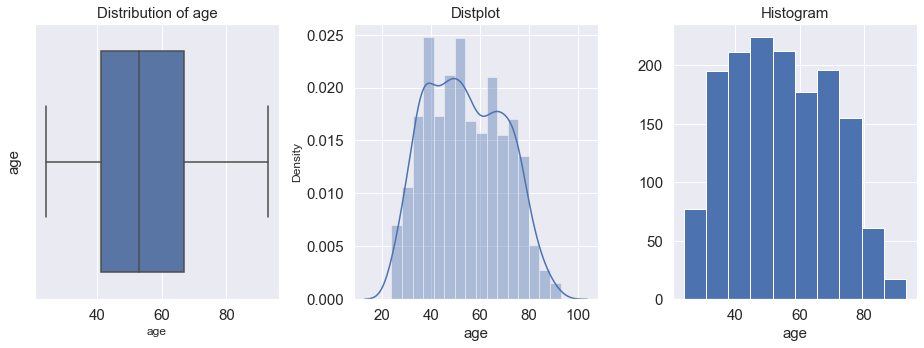

In [281]:
#Plotting boxplot, distplot and histogram of all integer variables
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='age',data=ele_df,orient='V',ax=ax1)
ax1.set_ylabel('age', fontsize=15)
ax1.set_title('Distribution of age', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(ele_df['age'],ax=ax2 )
ax2.set_xlabel('age', fontsize=15)
ax2.set_title('Distplot', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(ele_df['age'])
ax3.set_xlabel('age', fontsize=15)
ax3.set_title('Histogram', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

**Observation:**
* The data is normally distributed.
* Maximum number of people are aged between 40 and 70.
* Outliers are not present.
* The minimum value is 24 and the maximum value is 93.
* The mean value is 54.241266

**Ecomnomic.comd.national:**

In [41]:
ele_df['economic.cond.national'].describe(include='all').T

count    1517.000000
mean        3.245221
std         0.881792
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.national, dtype: float64

In [42]:
#Value Counts
ele_df["economic.cond.national"].value_counts()

3    604
4    538
2    256
5     82
1     37
Name: economic.cond.national, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


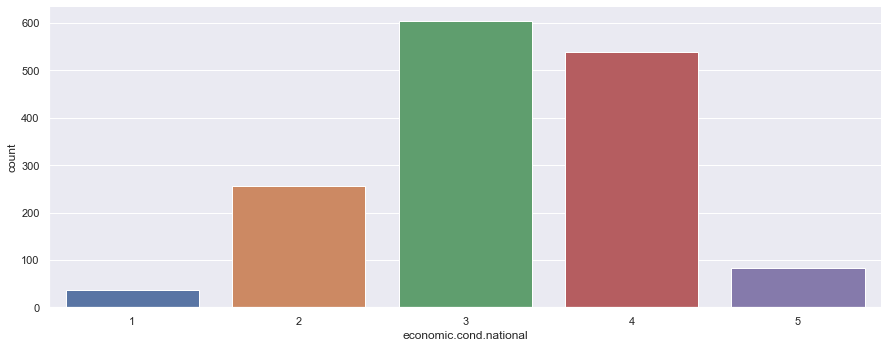

In [43]:
#Count plot
sns.catplot('economic.cond.national', data=ele_df, kind='count',aspect=2.5)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


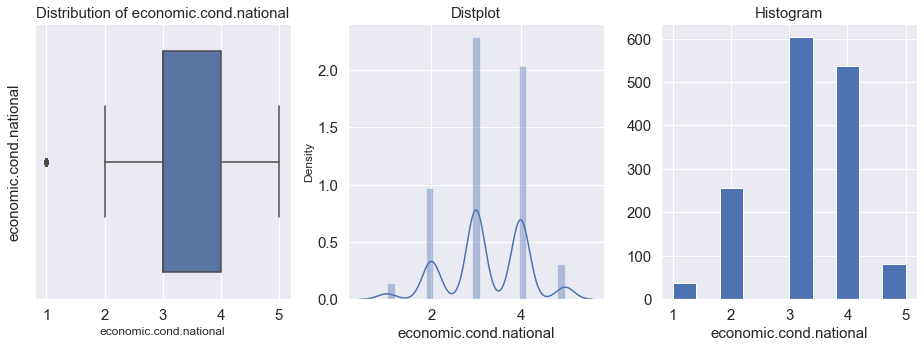

In [44]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='economic.cond.national',data=ele_df,orient='V',ax=ax1)
ax1.set_ylabel('economic.cond.national', fontsize=15)
ax1.set_title('Distribution of economic.cond.national', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(ele_df['economic.cond.national'],ax=ax2 )
ax2.set_xlabel('economic.cond.national', fontsize=15)
ax2.set_title('Distplot', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(ele_df['economic.cond.national'])
ax3.set_xlabel('economic.cond.national', fontsize=15)
ax3.set_title('Histogram', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

**Observation:**
* The top 2 variables are 3 and 4.
* 1 has the least value which is 37.
* 3 has the highest value which is 604.
* 3 is slightly higher than the 2nd highest variable 4 whosevalue is 538.
* The average score of 'economic.cond.national' is 3.245221
* There are outliers present in the data.

**Economic.cond.household:**  

In [45]:
ele_df['economic.cond.household'].describe(include='all').T

count    1517.000000
mean        3.137772
std         0.931069
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.household, dtype: float64

In [46]:
#Value Counts
ele_df["economic.cond.household"].value_counts()

3    645
4    435
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


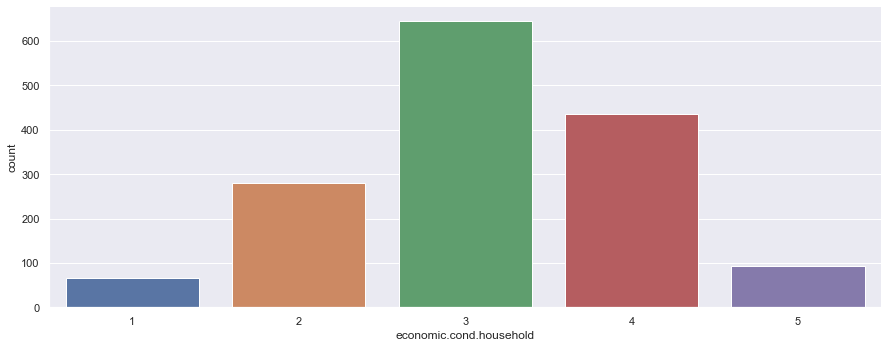

In [47]:
#Count plot
sns.catplot('economic.cond.household', data=ele_df, kind='count',aspect=2.5)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


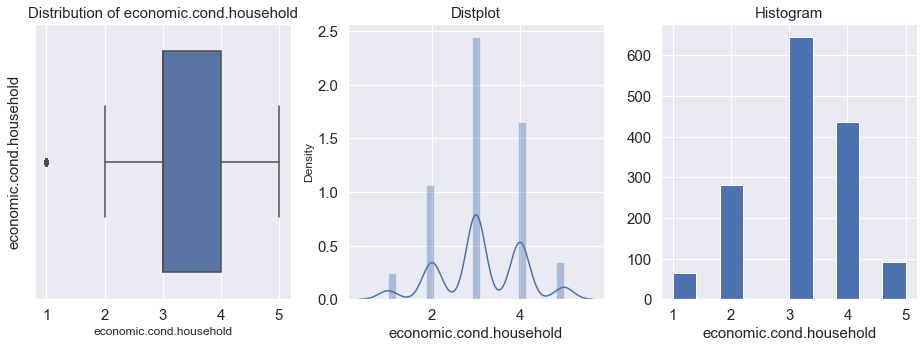

In [48]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='economic.cond.household',data=ele_df,orient='V',ax=ax1)
ax1.set_ylabel('economic.cond.household', fontsize=15)
ax1.set_title('Distribution of economic.cond.household', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(ele_df['economic.cond.household'],ax=ax2 )
ax2.set_xlabel('economic.cond.household', fontsize=15)
ax2.set_title('Distplot', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(ele_df['economic.cond.household'])
ax3.set_xlabel('economic.cond.household', fontsize=15)
ax3.set_title('Histogram', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

**Observations:**
* The top 2 variables are 3 and 4.
* 1 has the least value which is 65.
* 3 has the highest value which is 645.
* 3 is moderately higher than the 2nd highest variable 4 whose value is 435.
* The average score of 'economic.cond.household' is 3.137772

**Blair:**

In [49]:
ele_df['Blair'].describe(include='all').T

count    1517.000000
mean        3.335531
std         1.174772
min         1.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Blair, dtype: float64

In [50]:
#Value Counts
ele_df["Blair"].value_counts()

4    833
2    434
5    152
1     97
3      1
Name: Blair, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


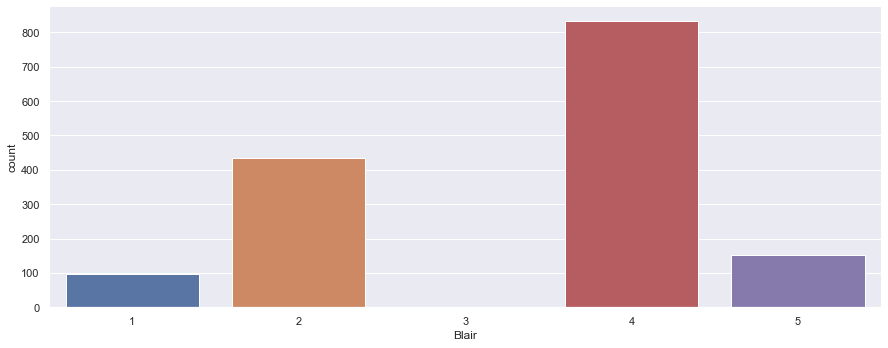

In [51]:
#Count plot
sns.catplot('Blair', data=ele_df, kind='count',aspect=2.5)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


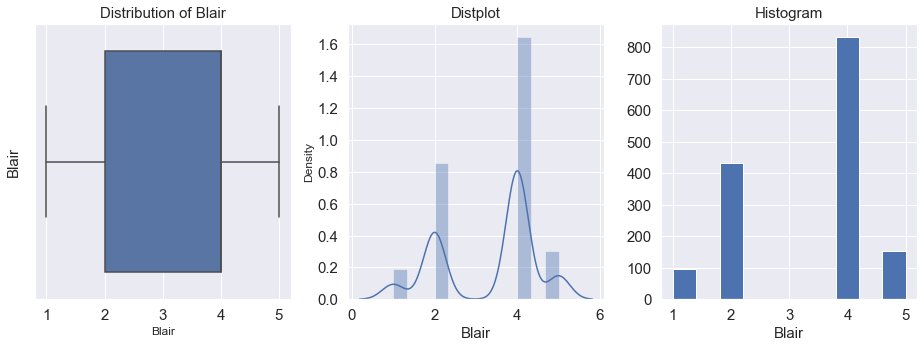

In [52]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Blair',data=ele_df,orient='V',ax=ax1)
ax1.set_ylabel('Blair', fontsize=15)
ax1.set_title('Distribution of Blair', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(ele_df['Blair'],ax=ax2 )
ax2.set_xlabel('Blair', fontsize=15)
ax2.set_title('Distplot', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(ele_df['Blair'])
ax3.set_xlabel('Blair', fontsize=15)
ax3.set_title('Histogram', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


**Observation:**
* The top 2 variables are 2 and 4.
* 3 has the least value which is 1.
* 4 has the highest value which is 833.
* 4 is much higher than the 2nd highest variable 2 whosevalue is 434.
* The average score of 'Blair' is 3.335531
* Found No outlier.

**Hague:**

In [53]:
ele_df['Hague'].describe(include='all').T

count    1517.000000
mean        2.749506
std         1.232479
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: Hague, dtype: float64

In [54]:
#Value Counts
ele_df["Hague"].value_counts()

2    617
4    557
1    233
5     73
3     37
Name: Hague, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


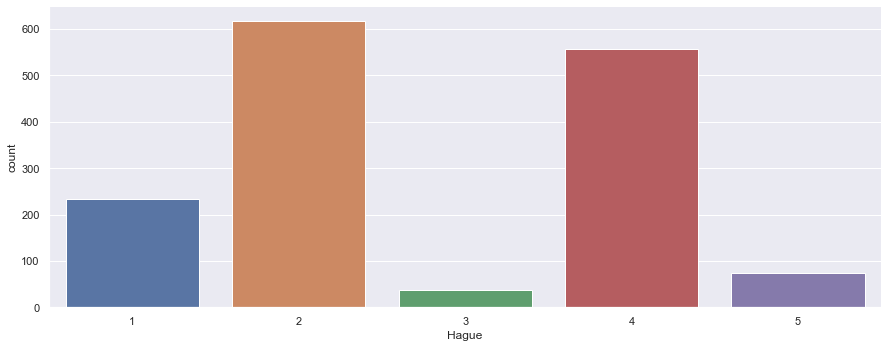

In [55]:
#Count plot
sns.catplot('Hague', data=ele_df, kind='count',aspect=2.5)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


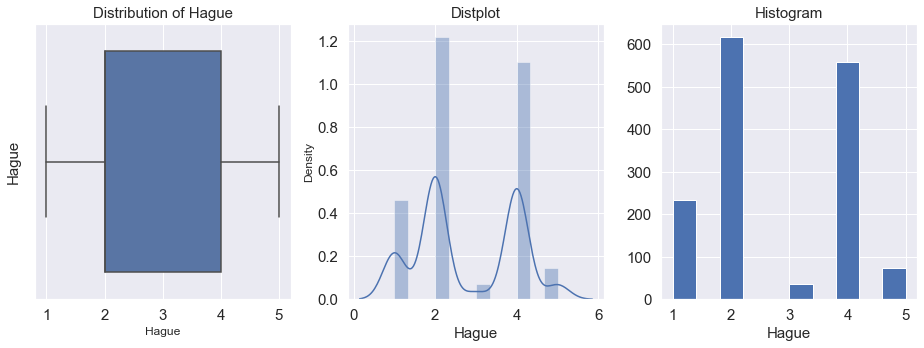

In [56]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Hague',data=ele_df,orient='V',ax=ax1)
ax1.set_ylabel('Hague', fontsize=15)
ax1.set_title('Distribution of Hague', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(ele_df['Hague'],ax=ax2 )
ax2.set_xlabel('Hague', fontsize=15)
ax2.set_title('Distplot', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(ele_df['Hague'])
ax3.set_xlabel('Hague', fontsize=15)
ax3.set_title('Histogram', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


**Observations:**
* The top 2 variables are 2 and 4.
* 3 has the least value which is 37.
* 2 has the highest value which is 617.
* is slightly higher than the 2nd highest variable 4 whosevalue is 557.
* The average score of 'Blair' is 2.749506
* No outliers found

**Europe:**

In [57]:
ele_df['Europe'].describe(include='all').T

count    1517.000000
mean        6.740277
std         3.299043
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        11.000000
Name: Europe, dtype: float64

In [58]:
#Value Counts
ele_df["Europe"].value_counts()

11    338
6     207
3     128
4     126
5     123
9     111
8     111
1     109
10    101
7      86
2      77
Name: Europe, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


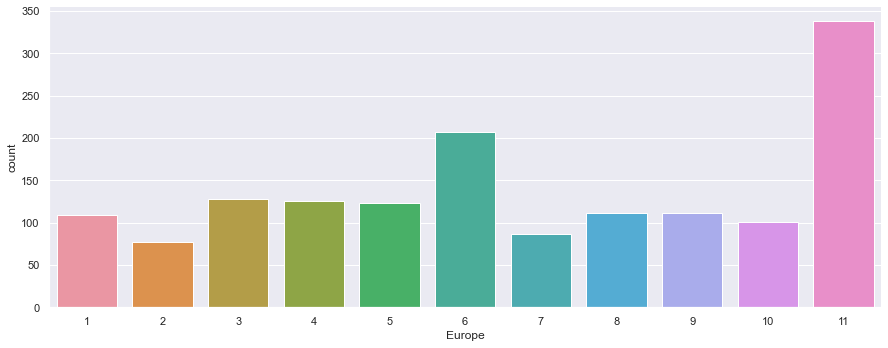

In [59]:
#Count plot
sns.catplot('Europe', data=ele_df, kind='count',aspect=2.5)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


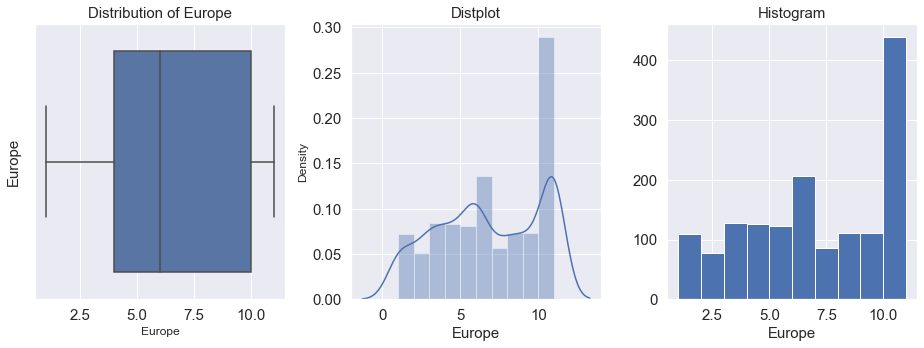

In [60]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Europe',data=ele_df,orient='V',ax=ax1)
ax1.set_ylabel('Europe', fontsize=15)
ax1.set_title('Distribution of Europe', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(ele_df['Europe'],ax=ax2 )
ax2.set_xlabel('Europe', fontsize=15)
ax2.set_title('Distplot', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(ele_df['Europe'])
ax3.set_xlabel('Europe', fontsize=15)
ax3.set_title('Histogram', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


**Observation:**
* The top 2 variables are 11 and 6.
* 2 has the least value which is 77.
* 11 has the highest value which is 338.
* 11 is moderately higher than the 2nd highest variable 6 whose value is 207.
* The average score of 'Europe' is 6.740277
* No outliers are found.

**political.knowledge:**

In [61]:
ele_df['political.knowledge'].describe(include='all').T

count    1517.000000
mean        1.540541
std         1.084417
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: political.knowledge, dtype: float64

In [62]:
#Value Counts
ele_df["political.knowledge"].value_counts()

2    776
0    454
3    249
1     38
Name: political.knowledge, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


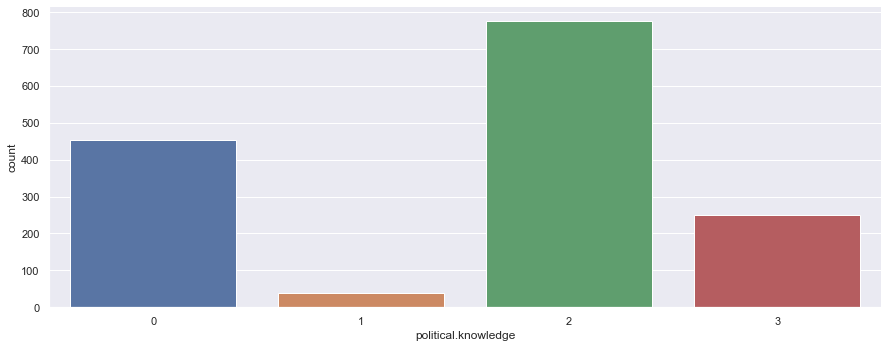

In [63]:
#Count plot
sns.catplot('political.knowledge', data=ele_df, kind='count',aspect=2.5)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


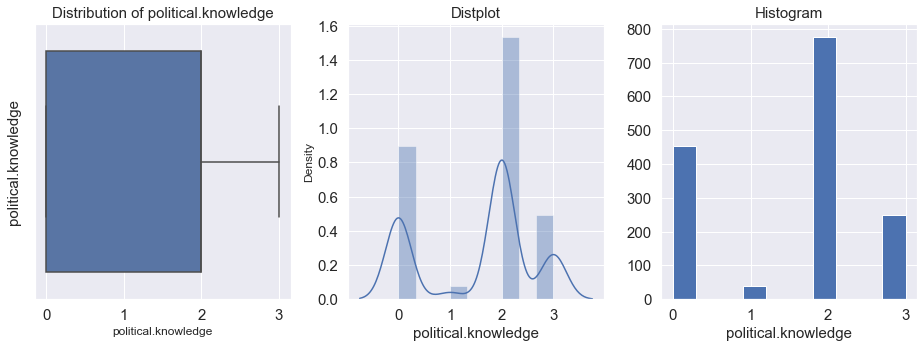

In [64]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='political.knowledge',data=ele_df,orient='V',ax=ax1)
ax1.set_ylabel('political.knowledge', fontsize=15)
ax1.set_title('Distribution of political.knowledge', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(ele_df['political.knowledge'],ax=ax2 )
ax2.set_xlabel('political.knowledge', fontsize=15)
ax2.set_title('Distplot', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(ele_df['political.knowledge'])
ax3.set_xlabel('political.knowledge', fontsize=15)
ax3.set_title('Histogram', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

**Observation:**
* The top 2 variables are 2 and 0.
* 1 has the least value which is 38.
* 2 has the highest value which is 776.
* 2 is much higher than the 2nd highest variable 0 whose value is 454.
* We can see that, 454 out of 1517 people do not have any knowledge of parties' positions on European integration which is 29.93% of the total population.
* The average score of 'Europe' is 6.740277
* No outliers are found.

**Gender:**

In [65]:
#Value counts
ele_df["gender"].value_counts()

female    808
male      709
Name: gender, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


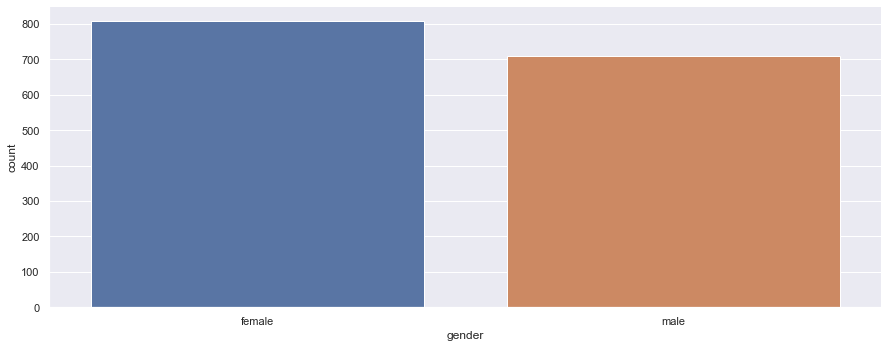

In [66]:
#Count plot
sns.catplot('gender', data=ele_df, kind='count',aspect=2.5)

Observation:
* Found women's count is more which is 808 and men's with 709 counts which is almost equal.

**Vote:**

In [67]:
#Value counts
ele_df["vote"].value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


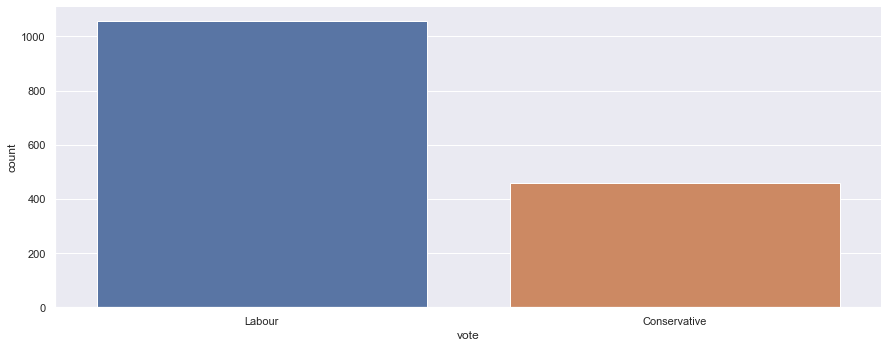

In [68]:
#Count plot
sns.catplot('vote', data=ele_df, kind='count',aspect=2.5)

**Observation:**
* Found most of the votes are from 'labours' with1057 counts followed by 'conservatives' with 460 counts.

### Checking skewness

In [69]:
ele_df.skew()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11624\508951572.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ele_df.skew()


age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

**Insights:**
* If the skewness is between -0.5 and 0.5, the data arefairly symmetrical.
* If the skewness is between -1 and – 0.5 or between 0.5and 1, the data are moderately skewed.
* If the skewness is less than -1 or greater than 1, the dataare highly skewed.
* Here, we can see that there isn't much skewness in thedata.
* All the values seems to be between -0.5 and 0.5.
* The value of 'Blair' is a little bit higher than -0.5.
* The data overall, is fairly symmetrical.

## Bivariate and Multivariate Analysis:

**Vote and Age:**

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vote', ylabel='age'>

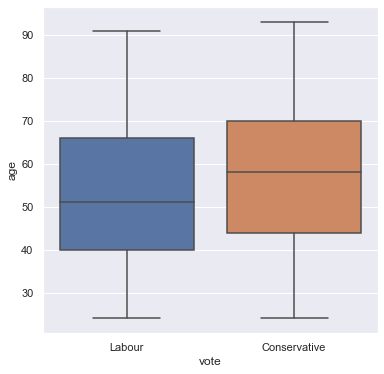

In [70]:

plt.figure(figsize=(6,6))
sns.boxplot(ele_df["vote"],ele_df["age"])



C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


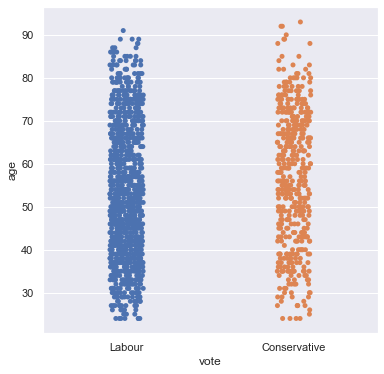

In [71]:
plt.figure(figsize=(6,6))

sns.stripplot(ele_df["vote"],ele_df["age"], jitter=True)
plt.show()

**Vote and Gender:**

In [72]:
ele_df[["vote","gender"]].value_counts()


vote          gender
Labour        female    551
              male      506
Conservative  female    257
              male      203
dtype: int64

**Observation:**
* We can clearly see that, the labour party has got more votes than the conservative party.
* In every age group, the labour party has got more votes than the conservative party.
* Female votes are considerably higher than the male votes in both parties.
* In both genders, the labour party has got more votes than the conservative party.

**vote and economic.cond.national:**

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


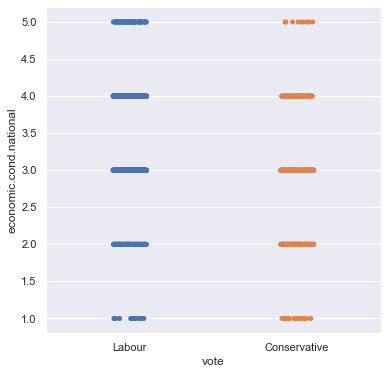

economic.cond.national  vote        
1                       Conservative     21
                        Labour           16
2                       Conservative    140
                        Labour          116
3                       Labour          405
                        Conservative    199
4                       Labour          447
                        Conservative     91
5                       Labour           73
                        Conservative      9
dtype: int64

In [73]:
#Strip plot of 'vote' and 'economic.cond.national':
plt.figure(figsize=(6,6))
sns.stripplot(ele_df["vote"], ele_df['economic.cond.national'], jitter=True) 
plt.show()

#Viewing the exact values of the variables of 'vote'with respect to 'economic.cond.national':
ele_df.groupby('economic.cond.national')[["vote","economic.cond.national"]].value_counts()

**Observations:**
* Labour party has higher votes overall.
* Out of 82 people who gave a score of 5, 73 people have voted for the labour party.
* Out of 538 people who gave a score of 4, 447 people have voted for the labour party. This is the highest set of people in the labour party.
* Out of 604 people who gave a score of 3, 405 people have voted for the labour party. This is the 2nd highest set of people in the labour party. The remaining 199 people who have voted for the conservative party is the highest set of people in that party.
* Out of 256 people who gave a score of 2, 116 people have voted for the labour party. 140 people have voted for the conservative party. This is the instance where the conservative party has got more votes than the labourparty.
* Out of 37 people who gave a score of 1, 16 people have voted for the labour party. 21 people have voted for the conservative party.
* The score of 3, 4 and 5 have more votes in the labour party.
* The score of 1 and 2 have more votes in the conservativeparty.

**vote and economic.cond.household**

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


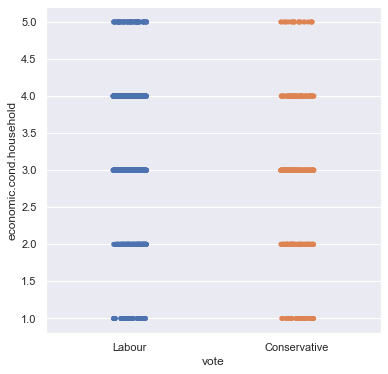

economic.cond.household  vote        
1                        Labour           37
                         Conservative     28
2                        Labour          154
                         Conservative    126
3                        Labour          448
                         Conservative    197
4                        Labour          349
                         Conservative     86
5                        Labour           69
                         Conservative     23
dtype: int64

In [74]:
#Strip plot of 'vote' and 'economic.cond.household':
plt.figure(figsize=(6,6))
sns.stripplot(ele_df["vote"], ele_df['economic.cond.household'], jitter=True) 
plt.show()

#Viewing the exact values of the variables of 'vote'with respect to 'economic.cond.household':
ele_df.groupby('economic.cond.household')[["vote","economic.cond.household"]].value_counts()

**Observation:**
* Labour party has higher votes overall.
* Out of 92 people who gave a score of 5, 69 people have voted for the labour party.
* Out of 435 people who gave a score of 4, 349 people have voted for the labour party. This is the 2nd highest set of people in the labour party.
* Out of 645 people who gave a score of 3, 448 people have voted for the labour party. This is the highest set of people in the labour party. The remaining 197 people who have voted for the conservative party is the highest set of people in that party.
* Out of 280 people who gave a score of 2, 154 people have voted for the labour party. 126 people have voted for the conservative party.
* Out of 65 people who gave a score of 1, 37 people have voted for the labour party. 28 people have voted for the conservative party.
* In all the instances, the labour party have more votes than the conservative party.


**vote' and Blair:**

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


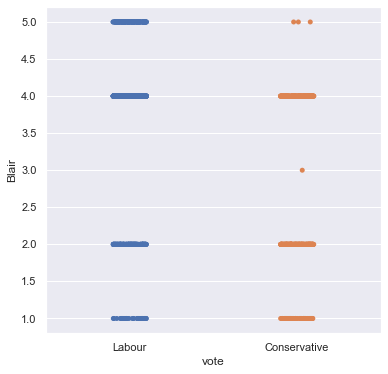

Blair  vote        
1      Conservative     59
       Labour           38
2      Conservative    240
       Labour          194
3      Conservative      1
4      Labour          676
       Conservative    157
5      Labour          149
       Conservative      3
dtype: int64

In [75]:
#Strip plot of 'vote' and 'Blair':
plt.figure(figsize=(6,6))
sns.stripplot(ele_df["vote"], ele_df['Blair'], jitter=True) 
plt.show()

#Value counts':
ele_df.groupby('Blair')[["vote","Blair"]].value_counts()

Observation:
* Labour party has higher votes overall.
* Out of 152 people who gave a score of 5, 149 people have voted for the labour party. The remaining 3 people, despite giving a score of 5 to the labour leader, have chosen to vote for the conservative party.
* Out of 833 people who gave a score of 4, 676 people have voted for the labour party. The remaining 157 people, despite giving a score of 4 to the labour leader, have chosen to vote for the conservative party.
* Only 1 person has given a score of 3 and that person hasvoted for the conservative party.
* Out of 434 people who gave a score of 2, 240 people have voted for the conservative party. The remaining 194 people, despite giving an unsatisfactory score of 2 to the labour leader, have chosen to vote for the labour party.
* Out of 97 people who gave a score of 1, 59 people have voted for the conservative party. The remaining 38 people, despite giving the lowest score of 1 to the labourleader, have chosen to vote for the labour party.
* The score of 4 and 5 have more votes in the labour party.
* The score of 1, 2 and 3 have more votes in the conservative party.

**vote and Hague:**

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


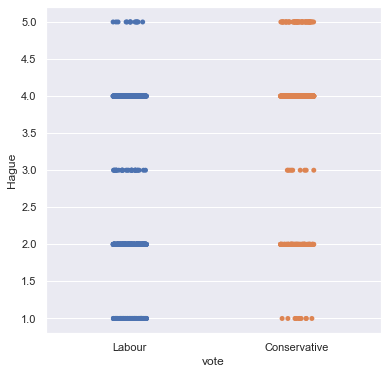

Hague  vote        
1      Labour          222
       Conservative     11
2      Labour          522
       Conservative     95
3      Labour           28
       Conservative      9
4      Conservative    286
       Labour          271
5      Conservative     59
       Labour           14
dtype: int64

In [76]:
#Strip plot of 'vote' and 'Hague':
plt.figure(figsize=(6,6))
sns.stripplot(ele_df["vote"], ele_df['Hague'], jitter=True) 
plt.show()

#Value counts':
ele_df.groupby('Hague')[["vote","Hague"]].value_counts()

**Observation:**
* Labour party has higher votes overall.
* Out of 73 people who gave a score of 5, 59 people have voted for the conservative party. The remaining 14people, despite giving a score of 5 to the conservative leader, have chosen to vote for the labour party.
* Out of 557 people who gave a score of 4, 286 people have voted for the conservative party. The remaining 271 people, despite giving a score of 4 to the conservative leader, have chosen to vote for the labour party.
* Out of 37 people who gave a score of 3, 28 have voted for the labour party. The remaining 9, despite giving an average score of 3 to the conservative party, have chosento vote for the conservative party.
* Out of 617 people who gave a score of 2, 522 people have voted for the labour party. The remaining 95 people, despite giving an unsatisfactory score of 2 to the conservative leader, have chosen to vote for the conservative party.
* Out of 233 people who gave a score of 1, 222 people havevoted for the labour party. The remaining 11 people,despite giving the lowest score of 1 to the conservative leader, have chosen to vote for the conservative party.
* The score of 4 and 5 have more votes in the conservative party, although in 4, the votes are almost equal in boththe parties. Conservative party gets slightly higher.
* The score of 1, 2 and 3 have more votes in the labourparty. Still, a significant percentage of people who gave a bad score to the conservative leader still chose to vote for 'Hague'.

**vote and Europe:**

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


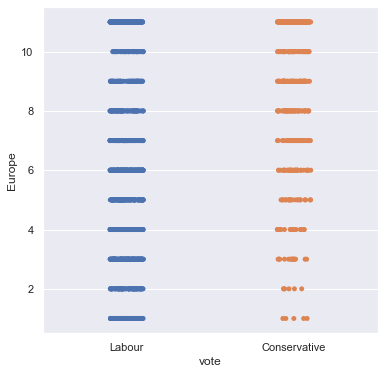

Europe  vote        
1       Labour          104
        Conservative      5
2       Labour           71
        Conservative      6
3       Labour          114
        Conservative     14
4       Labour          108
        Conservative     18
5       Labour          103
        Conservative     20
6       Labour          172
        Conservative     35
7       Labour           54
        Conservative     32
8       Labour           63
        Conservative     48
9       Conservative     56
        Labour           55
10      Conservative     54
        Labour           47
11      Conservative    172
        Labour          166
dtype: int64

In [77]:
#Strip plot of 'vote' and 'Europe':
plt.figure(figsize=(6,6))
sns.stripplot(ele_df["vote"], ele_df['Europe'], jitter=True) 
plt.show()

#Value counts':
ele_df.groupby('Europe')[["vote","Europe"]].value_counts()

**Observation:**
* Out of 338 people who gave a score of 11, 166 people have voted for the labour party and 172 people have voted for the conservative party.
*  People who gave score of 7 to 10 have voted for labourand conservative almost equally. Conservative party seem to be slightly higher in these instances.
* Out of 207 people who gave a score of 6, 172 people have voted for the labour party and 35 people have voted for the conservative party.
* People who gave a score of 1 to 6 have predominantly voted for the labour party. As we can see, there are a totalof 770 people who have given scores from 1 to 6. Out of 770 people, 672 people have voted for the labour party. So, 87.28% of the people have chosen labour party.
* So, we can infer that lower the 'Eurosceptic' sentiment, higher the votes for labour party.

**vote and political.knowledge:**

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


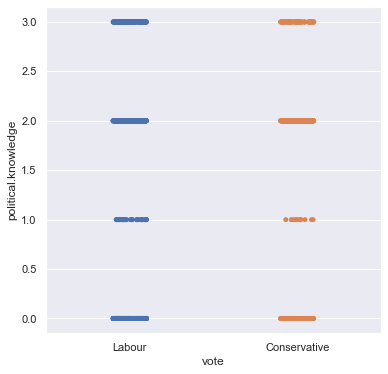

political.knowledge  vote        
0                    Labour          360
                     Conservative     94
1                    Labour           27
                     Conservative     11
2                    Labour          493
                     Conservative    283
3                    Labour          177
                     Conservative     72
dtype: int64

In [78]:
#Strip plot of 'vote' and 'political.knowledge':
plt.figure(figsize=(6,6))
sns.stripplot(ele_df["vote"], ele_df['political.knowledge'], jitter=True) 
plt.show()

#Value counts':
ele_df.groupby('political.knowledge')[["vote","political.knowledge"]].value_counts()

**Observation:**
* Out of 249 people who gave a score of 3, 177 people have voted for the labour party and 72 people have voted for the conservative party.
* Out of 776 people who gave a score of 2, 493 people have voted for the labour party and 283 people have voted for the conservative party.
* Out of 38 people who gave a score of 1, 27 people have voted for the labour party and 11 people have voted for the conservative party.
* Out of 454 people who gave a score of 0, 360 people have voted for the labour party and 94 people have voted for the conservative party.
* We can see that, in all instances, labour party gets the higher number of votes.
* Out of 1517 people, 454 people gave a score of 0. So, this means that, 29.93% of the people are casting their votes without any political knowledge.

### Checking pair-wise distribution of the continuous variables:

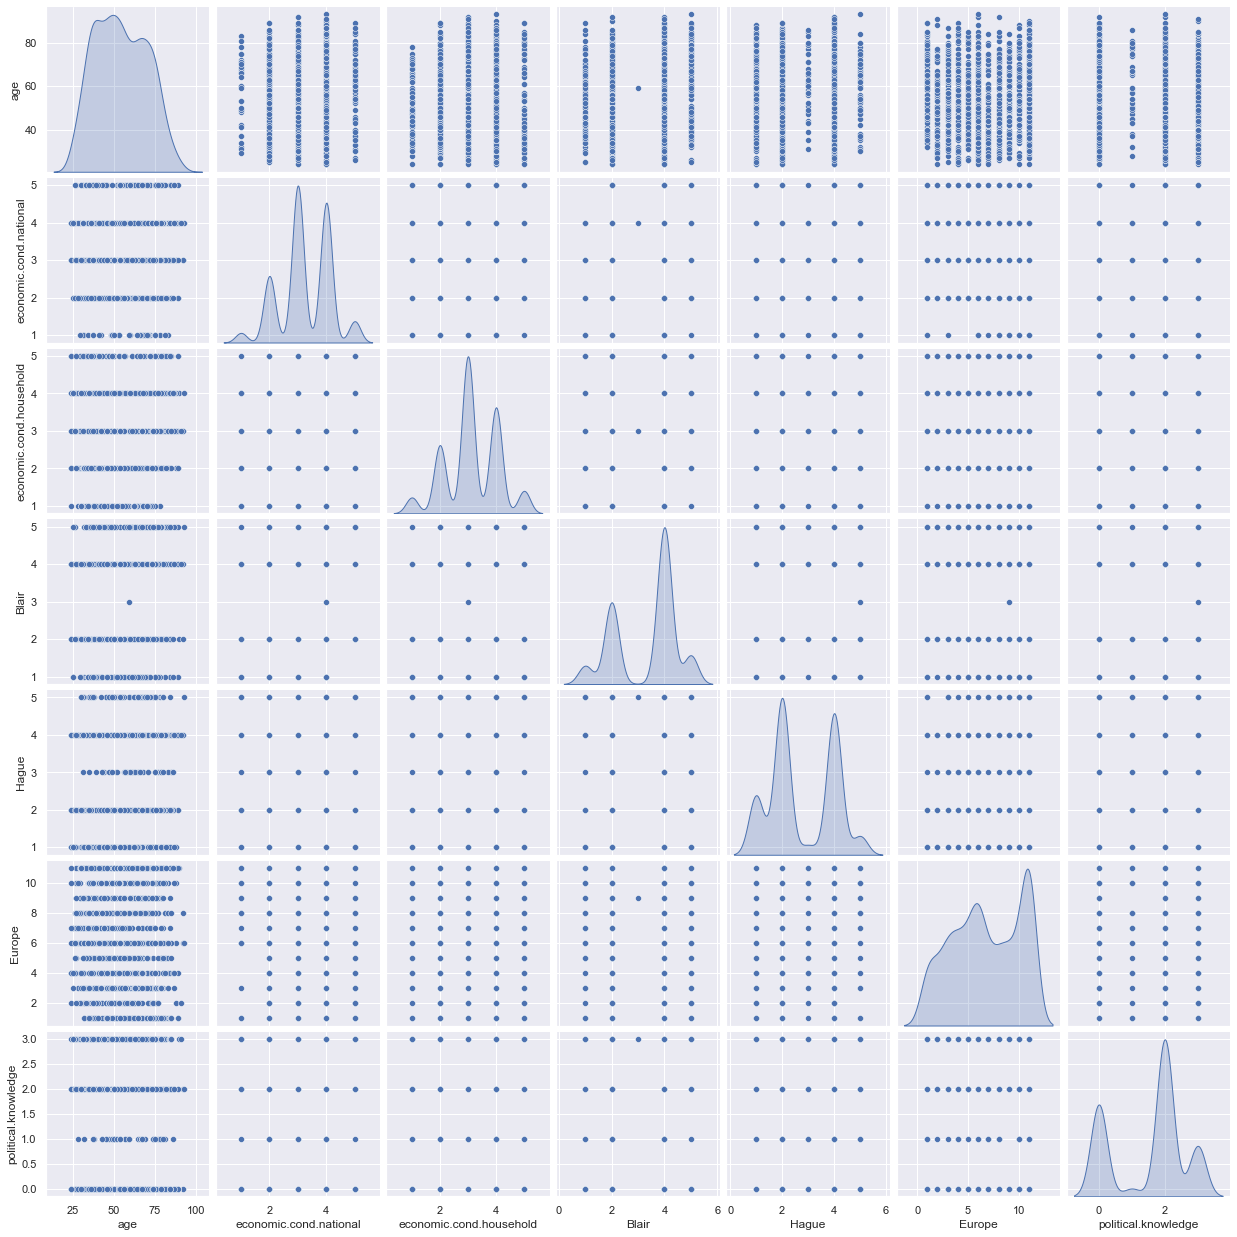

In [79]:
#Pairplot
sns.pairplot(ele_df,diag_kind='kde')

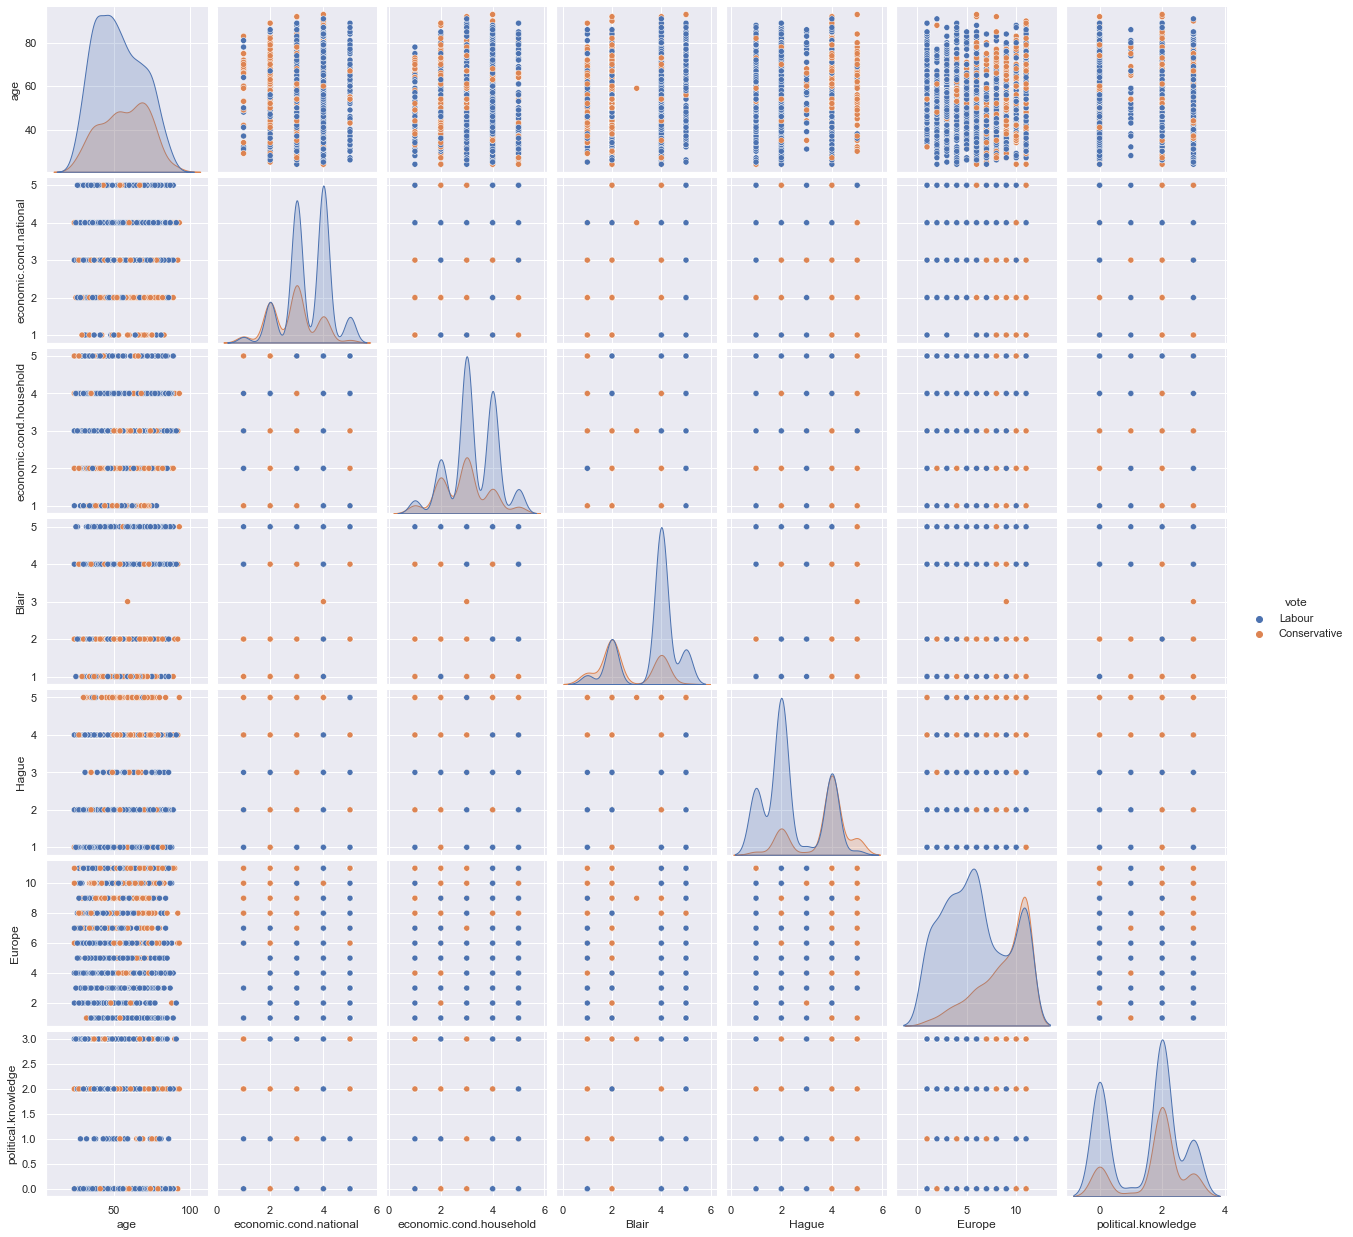

In [80]:
sns.pairplot(ele_df,diag_kind='kde',hue='vote')

In [81]:
ele_df.groupby('vote').skew()

#If the skewness is between -0.5 and 0.5, the data arefairly symmetrical.
#If the skewness is between -1 and – 0.5 or between 0.5and 1, the data are moderately skewed.
#If the skewness is less than -1 or greater than 1, the dataare highly skewed.

C:\Users\Admin\AppData\Local\Temp\ipykernel_11624\1460432563.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ele_df.groupby('vote').skew()


,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
vote,,,,,,,
Conservative,-0.116904,0.063419,0.140893,0.353688,-0.892401,-0.996315,-0.813972
Labour,0.253535,-0.355276,-0.255752,-1.035030,0.574230,0.208960,-0.267753


**Observation:**
* Pair plot is a combination of histograms and scatter plots.
* From the histogram, we can see that, the 'Blair','Europe' and 'political.knowledge' variables are slightly left skewed.
* The 'conservative' votes in  'Hague','Europe' and 'political.knowledg' are slightly left skewed. 'age','economic.cond.national',	'economic.cond.household' are almost symmetrical. 'Blair' is right skewed.
* The 'Labour' votes in 'economic.cond.national','economic.cond.household','Blair' and 'political.knowledge' are left skewed. 'age','Hague' and 'Europe' are right skewed.
* All other variables seem to be normally distributed in overall votes.
* From the scatter plots, we can see that, there is mostly no correlation between the variables.


In [82]:
# The correlation matrix to view multicolinearity.

ele_df.corr()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018687,-0.038868,0.032084,0.031144,0.064562,-0.046598
economic.cond.national,0.018687,1.000000,0.347687,0.326141,-0.200790,-0.209150,-0.023510
economic.cond.household,-0.038868,0.347687,1.000000,0.215822,-0.100392,-0.112897,-0.038528
Blair,0.032084,0.326141,0.215822,1.000000,-0.243508,-0.295944,-0.021299
Hague,0.031144,-0.200790,-0.100392,-0.243508,1.000000,0.285738,-0.029906
Europe,0.064562,-0.209150,-0.112897,-0.295944,0.285738,1.000000,-0.151197
political.knowledge,-0.046598,-0.023510,-0.038528,-0.021299,-0.029906,-0.151197,1.000000


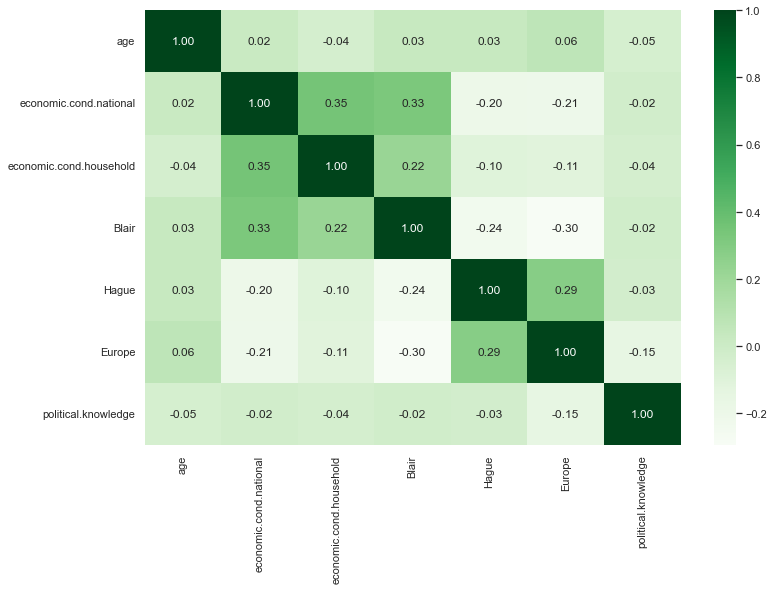

In [83]:
#Get the correlation heat-map

plt.figure(figsize = (12,8))
sns.heatmap(ele_df.corr(), annot = True, cmap = 'Greens',fmt = '.2f');

**Observation:**
* We can see that, mostly there is no correlation in the dataset through this matrix. There are some variables that are moderately positively correlated and some that are slightly negatively correlated.
* ‘economic.cond.national’ with ‘economic.cond.household’ have moderate positive correlation.
* ‘Blair' with 'economic.cond.national' and ‘economic.cond.household’ have moderate positive correlation.
* ‘Europe’ with ‘Hague’ have moderate positive correlation.
* 'Hague' with 'economic.cond.national' and 'Blair' have moderate negative correlation.
* 'Europe' with 'economic.cond.national' and 'Blair' have moderate negative correlation.

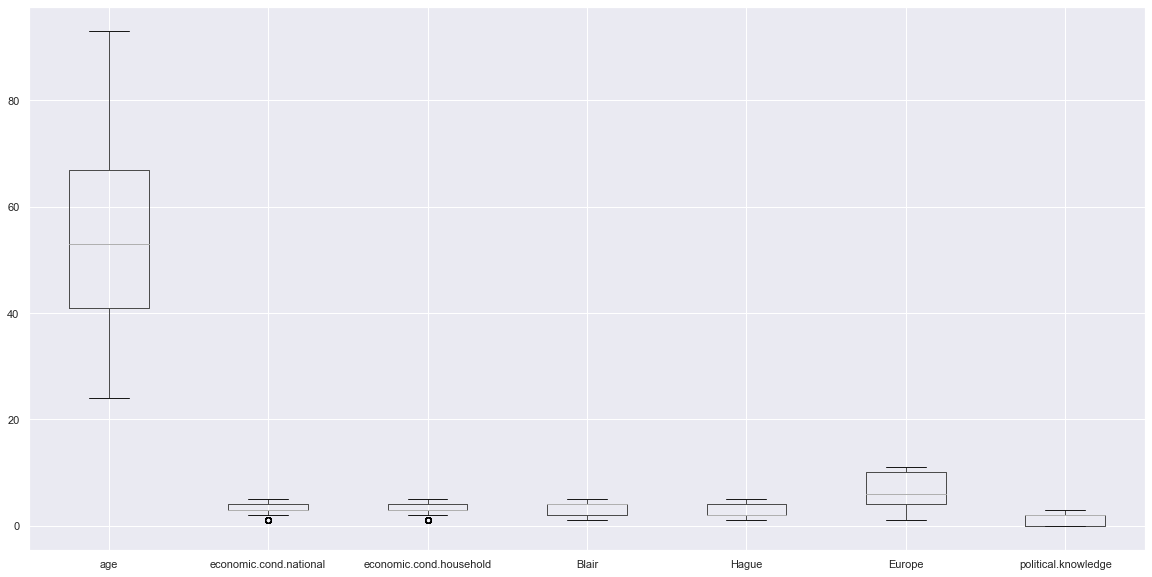

In [84]:
#Checking for Outliers:
plt.figure(figsize=(20,10))
ele_df.boxplot()
plt.show()

**Observation:**
* We found outliers in 'economic.cond.national' and 'economic.cond.household' variables. and we are not going to treat outliers in this approach as it is not required.

# 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

In [85]:
ele_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1517,2,Labour,1057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1517.0,NaN,NaN,NaN,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,NaN,NaN,NaN,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,NaN,NaN,NaN,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,NaN,NaN,NaN,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,NaN,NaN,NaN,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,NaN,NaN,NaN,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,NaN,NaN,NaN,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0
gender,1517,2,female,808,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**We found there are two non integer colums i.e., Vote and Gender.**

In [86]:
cat = ['vote', 'gender']

In [87]:
df =pd.get_dummies(ele_df, columns=cat,drop_first=True)

#Viewing the data after encoding:
df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


In [88]:
#Viewing the data after encoding:
df.sample(10)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
645,41,4,4,4,1,4,0,1,0
1377,66,4,3,4,2,6,2,1,1
883,81,5,3,5,2,8,2,1,1
866,49,2,3,4,1,6,2,1,0
266,71,5,2,4,3,3,3,1,1
831,66,4,3,4,2,5,3,1,0
1406,59,3,2,1,2,1,2,1,1
595,38,4,3,5,5,3,2,1,1
140,35,4,3,4,2,4,3,1,1
259,45,3,3,2,2,1,0,1,0


In [89]:
#encoded data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      1517 non-null   int64
 1   economic.cond.national   1517 non-null   int64
 2   economic.cond.household  1517 non-null   int64
 3   Blair                    1517 non-null   int64
 4   Hague                    1517 non-null   int64
 5   Europe                   1517 non-null   int64
 6   political.knowledge      1517 non-null   int64
 7   vote_Labour              1517 non-null   uint8
 8   gender_male              1517 non-null   uint8
dtypes: int64(7), uint8(2)
memory usage: 130.1 KB


The above data looks fine for our model creations.

## Scaling:
* The dataset contains features highly varying in magnitudes, units and range between the 'age' columnand other columns.
* But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations, this is a problem.
* If left alone, these algorithms only take in the magnitude of features neglecting the units.
* The results would vary greatly between different units, 1km and 1000 metres.
* The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.
* To supress this effect, we need to bring all features to the same level of magnitudes. This can be acheived by scaling.
* in this case, we have a lot of encoded, ordinal, categorical and continuous variables. So, we use the **minmaxscaler technique to scale the data**.

In [90]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [91]:
# Creating an instance of the sklearn.preprocessing.MinMaxScaler()
scaler = MinMaxScaler()

In [92]:
# Scaling all the column of the dataframe and storing in a new dataframe sdf
scaled= scaler.fit_transform(df)
sdf=pd.DataFrame(scaled)
sdf.columns=['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','vote_Labour','gender_male']

In [93]:
sdf.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,0.275362,0.50,0.50,0.75,0.00,0.1,0.666667,1.0,0.0
1,0.173913,0.75,0.75,0.75,0.75,0.4,0.666667,1.0,1.0
2,0.159420,0.75,0.75,1.00,0.25,0.2,0.666667,1.0,1.0
3,0.000000,0.75,0.25,0.25,0.00,0.3,0.000000,1.0,0.0
4,0.246377,0.25,0.25,0.00,0.00,0.5,0.666667,1.0,1.0


Above is the scaled dataframe

**Train-test-split:**
Our model will use all the variables and 'vote_Labour' is the target variable. The train-test split is a technique for evaluating the performance of a machine learning algorithm.The procedure involves taking a dataset and dividing it into two subsets.
* Train Dataset: Used to fit the machine learning model.
* Test Dataset: Used to evaluate the fit machine learning model.

In [94]:
x = sdf.drop("vote_Labour", axis=1)
y = sdf[["vote_Labour"]]

In [95]:
sdf.sample(10)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
304,0.608696,0.25,0.50,0.75,0.75,0.9,0.666667,0.0,1.0
340,0.202899,0.50,0.25,0.25,0.75,1.0,0.666667,0.0,1.0
93,0.594203,0.50,0.50,0.75,0.25,0.5,0.000000,1.0,0.0
1078,0.260870,0.50,0.50,0.75,0.00,0.5,0.666667,1.0,0.0
485,0.550725,0.25,0.50,0.25,0.75,0.2,0.000000,1.0,0.0
858,0.275362,0.50,0.75,0.25,0.75,1.0,0.666667,0.0,1.0
1250,0.376812,0.50,0.25,0.75,0.75,1.0,0.666667,1.0,1.0
11,0.608696,0.75,0.50,0.75,0.75,0.8,0.666667,1.0,1.0
1020,0.333333,0.75,0.50,0.75,0.25,0.3,0.666667,1.0,1.0
1263,0.434783,0.25,0.25,0.25,1.00,1.0,0.666667,0.0,1.0


In [96]:
x.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,0.275362,0.50,0.50,0.75,0.00,0.1,0.666667,0.0
1,0.173913,0.75,0.75,0.75,0.75,0.4,0.666667,1.0
2,0.159420,0.75,0.75,1.00,0.25,0.2,0.666667,1.0
3,0.000000,0.75,0.25,0.25,0.00,0.3,0.000000,0.0
4,0.246377,0.25,0.25,0.00,0.00,0.5,0.666667,1.0


In [97]:
y.sample(10)

,vote_Labour
74,1.0
134,0.0
1348,1.0
595,0.0
1049,0.0
959,0.0
1203,1.0
928,1.0
191,1.0
803,0.0


In [98]:
x_train,x_test , y_train, y_test = train_test_split(x,y,test_size = .30 ,random_state = 1)

In [99]:
print("The shape of x_train is ",x_train.shape)
print("The shape of y_train is ",y_train.shape)
print("The shape of x_test ",x_test.shape)
print("The shape of y_test is ",y_test.shape)

The shape of x_train is  (1061, 8)
The shape of y_train is  (1061, 1)
The shape of x_test  (456, 8)
The shape of y_test is  (456, 1)


In [100]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(sdf.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(sdf.index)) * 100))

69.94% data is in training set
30.06% data is in test set


In [101]:
print("Original Vote_Labour True Values    : {0} ({1:0.2f}%)".format(len(sdf.loc[sdf['vote_Labour'] == 1]), (len(sdf.loc[sdf['vote_Labour'] == 1])/len(sdf.index)) * 100))
print("Original Vote_Labour False Values   : {0} ({1:0.2f}%)".format(len(sdf.loc[sdf['vote_Labour'] == 0]), (len(sdf.loc[sdf['vote_Labour'] == 0])/len(sdf.index)) * 100))
print("")
print("Training Vote_Labour True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train['vote_Labour'] == 1]), (len(y_train[y_train['vote_Labour'] == 1])/len(y_train)) * 100))
print("Training Vote_Labour False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train['vote_Labour'] == 0]), (len(y_train[y_train['vote_Labour'] == 0])/len(y_train)) * 100))
print("")
print("Test Vote_Labour True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test['vote_Labour'] == 1]), (len(y_test[y_test['vote_Labour'] == 1])/len(y_test)) * 100))
print("Test Vote_Labour False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test['vote_Labour'] == 0]), (len(y_test[y_test['vote_Labour'] == 0])/len(y_test)) * 100))
print("")

Original Vote_Labour True Values    : 1057 (69.68%)
Original Vote_Labour False Values   : 460 (30.32%)

Training Vote_Labour True Values    : 754 (71.07%)
Training Vote_Labour False Values   : 307 (28.93%)

Test Vote_Labour True Values        : 303 (66.45%)
Test Vote_Labour False Values       : 153 (33.55%)



# 1.4 Apply Logistic Regression and LDA (linear discriminant analysis). 

In [102]:
Logistic_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
Logistic_model.fit(x_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    3.0s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [103]:
y_train_predict_lr=Logistic_model.predict(x_train)


#model score
Logistic_model_score=Logistic_model.score(x_train,y_train)
print(Logistic_model_score)



0.8312912346842601


[[196 111]
 [ 68 686]]
AxesSubplot(0.125,0.125;0.62x0.755)


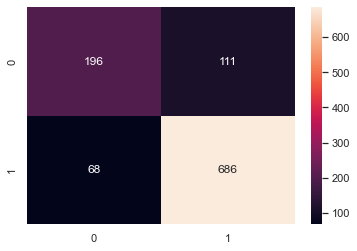

In [104]:
print(metrics.confusion_matrix(y_train,y_train_predict_lr))

print(sns.heatmap(confusion_matrix(y_train,y_train_predict_lr),annot=True , fmt="2g"))

In [105]:
#Classification report - Train data:
print(metrics.classification_report(y_train,y_train_predict_lr))

              precision    recall  f1-score   support

         0.0       0.74      0.64      0.69       307
         1.0       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [106]:
#Test Data

y_test_predict_lr=Logistic_model.predict(x_test)

#model score
Logistic_model_score_test=Logistic_model.score(x_test,y_test)
print(Logistic_model_score_test)

0.8355263157894737


[[113  40]
 [ 35 268]]
AxesSubplot(0.125,0.125;0.62x0.755)


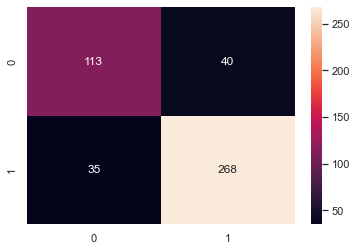

In [107]:
print(metrics.confusion_matrix(y_test,y_test_predict_lr))

print(sns.heatmap(confusion_matrix(y_test,y_test_predict_lr),annot=True , fmt="2g"))

In [108]:
#Classification report - Test data:
print(metrics.classification_report(y_test,y_test_predict_lr))

              precision    recall  f1-score   support

         0.0       0.76      0.74      0.75       153
         1.0       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456



In [109]:
#Mean square error:
print('Mean square error-Train data:',mean_squared_error(y_train_predict_lr, y_train))
print('Mean square error-Test data:',mean_squared_error(y_test_predict_lr, y_test))

Mean square error-Train data: 0.16870876531573986
Mean square error-Test data: 0.16447368421052633


AUC for the Train dataset: 0.890


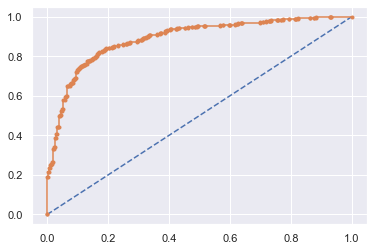

In [110]:
# AUC and ROC for the training data

# predict probabilities
probs = Logistic_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_train, probs)
print('AUC for the Train dataset: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC for Test dataset is: 0.883


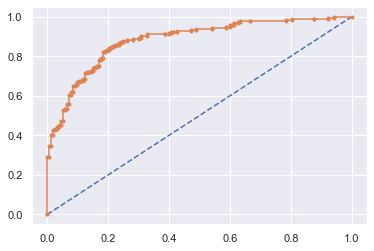

In [111]:
# AUC and ROC for the test data

# predict probabilities
probs = Logistic_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC for Test dataset is: %.3f' % auc)

# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Logistic Regression Model - Observation:

**Train data:**
* Accuracy: 83.12%
* Precision: 86%
* Recall: 91%
* F1-Score: 88%
* Mean square error(MSE): 0.16870876531573986
* AUC:0.890

**Test data:**
* Accuracy: 83.55%
* Precision: 87%
* Recall: 88%
* F1-Score: 88%
* Mean square error(MSE): 0.16447368421052633
* AUC: 0.883

**Validness of the model:**
* The model is not over-fitted or under-fitted.
* The error in the test data is slightly higher than the train data, which is absolutely fine because the error margin is low and the error in both train and test data is not too high. Thus, the model is not over-fitted or under-fitted.

### Linear Discriminant Analysis Model(LDA):

In [112]:
lda = LinearDiscriminantAnalysis()

In [113]:
lda = lda.fit(x_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [114]:
#Train data prediction
y_train_predict_lda=lda.predict(x_train)

#confusion matrics and classification report of train Data
print(confusion_matrix(lda.predict(x_train),y_train))
print(classification_report(lda.predict(x_train),y_train))

[[200  69]
 [107 685]]
              precision    recall  f1-score   support

         0.0       0.65      0.74      0.69       269
         1.0       0.91      0.86      0.89       792

    accuracy                           0.83      1061
   macro avg       0.78      0.80      0.79      1061
weighted avg       0.84      0.83      0.84      1061



AxesSubplot(0.125,0.125;0.62x0.755)
LDA score of train data: 0.8341187558906692


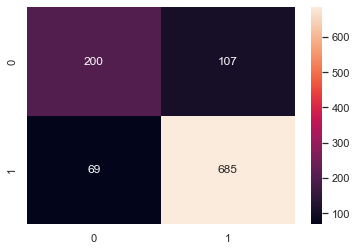

In [115]:
LDA_score_train=lda.score(x_train,y_train)


print(sns.heatmap(confusion_matrix(y_train,y_train_predict_lda),annot=True , fmt="2g"))
print('LDA score of train data:',LDA_score_train)

In [116]:
#Test data prediction
y_test_predict_lda=lda.predict(x_test)

#confusion matrics and classification report of test Data
print(confusion_matrix(lda.predict(x_test),y_test))
print(classification_report(lda.predict(x_test),y_test))

[[111  34]
 [ 42 269]]
              precision    recall  f1-score   support

         0.0       0.73      0.77      0.74       145
         1.0       0.89      0.86      0.88       311

    accuracy                           0.83       456
   macro avg       0.81      0.82      0.81       456
weighted avg       0.84      0.83      0.83       456



AxesSubplot(0.125,0.125;0.62x0.755)
LDA score of test data: 0.8333333333333334


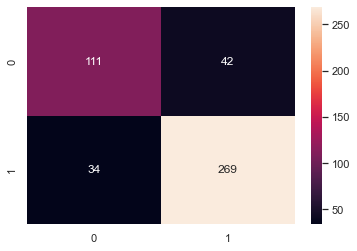

In [117]:
LDA_score_test=lda.score(x_test,y_test)


print(sns.heatmap(confusion_matrix(y_test,y_test_predict_lda),annot=True , fmt="2g"))
print('LDA score of test data:',LDA_score_test)

In [118]:
#Mean square error:
print('Mean square error-Train data:',mean_squared_error(y_train_predict_lda, y_train))
print('Mean square error-Test data:',mean_squared_error(y_test_predict_lda, y_test))

Mean square error-Train data: 0.16588124410933083
Mean square error-Test data: 0.16666666666666666


AUC for the Train dataset: 0.889


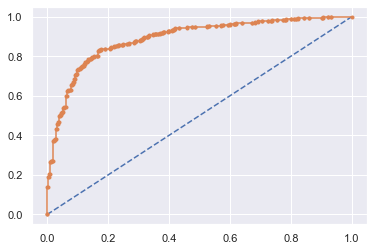

In [119]:
# AUC and ROC for the training data

# predict probabilities
probs = lda.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

auc = roc_auc_score(y_train, probs)
print('AUC for the Train dataset: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()

AUC for the Train dataset: 0.888


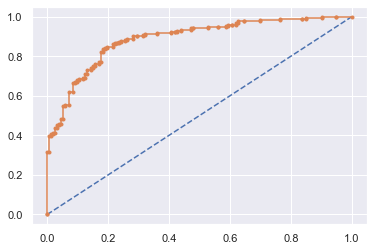

In [120]:
# AUC and ROC for the training data

# predict probabilities
probs = lda.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

auc = roc_auc_score(y_test, probs)
print('AUC for the Train dataset: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()

### Linear Discriminant Analysis(LDA) - Observation:

**Train data:**
* Accuracy: 83.41%
* Precision: 91%
* Recall: 86%
* F1-Score: 89%
* Mean square error(MSE):  0.166
* AUC:0.889

**Test data:**
* Accuracy: 83.33%
* Precision: 89%
* Recall: 86%
* F1-Score: 88%
* Mean square error(MSE): 0.166
* AUC: 0.888  

**Validness of the model:**
* The model is not over-fitted or under-fitted.
* The error in the test data is slightly higher than the train data, which is absolutely fine because the error margin is low and the error in both train and test data is not too high. Thus, the model is not over-fitted or under-fitted.

# 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. 

In [121]:
#KNN Model creation
KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [122]:
#Prediction of Train data
y_train_predict_knn=KNN_model.predict(x_train)

KNN_model_score=KNN_model.score(x_train,y_train)
print(KNN_model_score)

0.8567389255419415


In [125]:
print(metrics.confusion_matrix(y_train,y_train_predict_knn))
print(metrics.classification_report(y_train,y_train_predict_knn))

[[222  85]
 [ 67 687]]
              precision    recall  f1-score   support

         0.0       0.77      0.72      0.74       307
         1.0       0.89      0.91      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.82      0.82      1061
weighted avg       0.85      0.86      0.86      1061



AUC for the Train dataset: 0.930


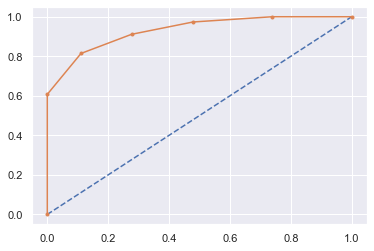

In [126]:
# AUC and ROC for the training data

# predict probabilities
probs = KNN_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

auc = roc_auc_score(y_train, probs)
print('AUC for the Train dataset: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()

In [127]:
#Prediction of Train data
y_test_predict_knn=KNN_model.predict(x_test)

KNN_model_score=KNN_model.score(x_test,y_test)
print(KNN_model_score)

0.8201754385964912


In [130]:
print(metrics.confusion_matrix(y_test,y_test_predict_knn))
print(metrics.classification_report(y_test,y_test_predict_knn))

[[107  46]
 [ 36 267]]
              precision    recall  f1-score   support

         0.0       0.75      0.70      0.72       153
         1.0       0.85      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456



AUC for the Test dataset: 0.873


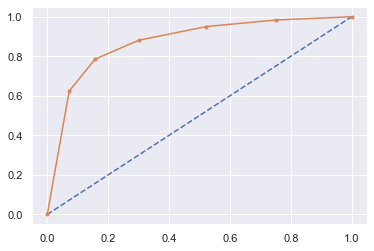

In [131]:
# AUC and ROC for the testing data

# predict probabilities
probs = KNN_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

auc = roc_auc_score(y_test, probs)
print('AUC for the Test dataset: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()

In [132]:
#Mean square error:
print('Mean square error-Train data:',mean_squared_error(y_train_predict_knn, y_train))
print('Mean square error-Test data:',mean_squared_error(y_test_predict_knn, y_test))

Mean square error-Train data: 0.14326107445805844
Mean square error-Test data: 0.17982456140350878


In [133]:
#lets take K value n_neighbors=7
KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(x_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [134]:
#Train data prediction
y_train_predict_knn=KNN_model.predict(x_train)

KNN_model_score=KNN_model.score(x_train,y_train)
print(KNN_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict_knn))
print(metrics.classification_report(y_train,y_train_predict_knn))

0.8407163053722903
[[214  93]
 [ 76 678]]
              precision    recall  f1-score   support

         0.0       0.74      0.70      0.72       307
         1.0       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.80      1061
weighted avg       0.84      0.84      0.84      1061



In [135]:
#Test data prediction
y_test_predict_knn=KNN_model.predict(x_test)

KNN_model_score=KNN_model.score(x_test,y_test)
print(KNN_model_score)

print(metrics.confusion_matrix(y_test,y_test_predict_knn))
print(metrics.classification_report(y_test,y_test_predict_knn))

0.8399122807017544
[[111  42]
 [ 31 272]]
              precision    recall  f1-score   support

         0.0       0.78      0.73      0.75       153
         1.0       0.87      0.90      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.82       456
weighted avg       0.84      0.84      0.84       456



In [136]:
#lets take K value n_neighbors=5
KNN_model=KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [137]:
#Train data prediction
y_train_predict_knn=KNN_model.predict(x_train)

KNN_model_score=KNN_model.score(x_train,y_train)
print(KNN_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict_knn))
print(metrics.classification_report(y_train,y_train_predict_knn))

0.8567389255419415
[[222  85]
 [ 67 687]]
              precision    recall  f1-score   support

         0.0       0.77      0.72      0.74       307
         1.0       0.89      0.91      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.82      0.82      1061
weighted avg       0.85      0.86      0.86      1061



In [138]:
#Test data prediction
y_test_predict_knn=KNN_model.predict(x_test)

KNN_model_score=KNN_model.score(x_test,y_test)
print(KNN_model_score)

print(metrics.confusion_matrix(y_test,y_test_predict_knn))
print(metrics.classification_report(y_test,y_test_predict_knn))

0.8201754385964912
[[107  46]
 [ 36 267]]
              precision    recall  f1-score   support

         0.0       0.75      0.70      0.72       153
         1.0       0.85      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456



In [139]:
ac_score=[]

for k in range(1,30,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    scores=knn.score(x_test,y_test)
    ac_score.append(scores)

ac_score    

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[0.756578947368421,
 0.7982456140350878,
 0.8201754385964912,
 0.8399122807017544,
 0.8421052631578947,
 0.8333333333333334,
 0.8377192982456141,
 0.8421052631578947,
 0.8377192982456141,
 0.8355263157894737,
 0.8333333333333334,
 0.8333333333333334,
 0.8289473684210527,
 0.8289473684210527,
 0.8267543859649122]

In [140]:
MCE=[1-x for x in ac_score]
MCE

[0.24342105263157898,
 0.20175438596491224,
 0.17982456140350878,
 0.1600877192982456,
 0.1578947368421053,
 0.16666666666666663,
 0.16228070175438591,
 0.1578947368421053,
 0.16228070175438591,
 0.16447368421052633,
 0.16666666666666663,
 0.16666666666666663,
 0.17105263157894735,
 0.17105263157894735,
 0.17324561403508776]

**From the above data we found that the model score is better when the value of K (n_neighbors) value is 9 and 15 which is 0.8421**
**The error when K=9 or 15 is 0.1578**

In [141]:
#lets take K value n_neighbors=9
KNN=KNeighborsClassifier(n_neighbors=9)
KNN.fit(x_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=9)

In [142]:
#Train data prediction
y_train_predict_knn=KNN.predict(x_train)

KNN_score_train=KNN.score(x_train,y_train)
print(KNN_score_train)
print(metrics.confusion_matrix(y_train,y_train_predict_knn))
print(metrics.classification_report(y_train,y_train_predict_knn))

0.8454288407163054
[[214  93]
 [ 71 683]]
              precision    recall  f1-score   support

         0.0       0.75      0.70      0.72       307
         1.0       0.88      0.91      0.89       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061



In [143]:
#Test data prediction
y_test_predict_knn=KNN.predict(x_test)

KNN_score_test=KNN.score(x_test,y_test)
print(KNN_score_test)
print(metrics.confusion_matrix(y_test,y_test_predict_knn))
print(metrics.classification_report(y_test,y_test_predict_knn))

0.8421052631578947
[[113  40]
 [ 32 271]]
              precision    recall  f1-score   support

         0.0       0.78      0.74      0.76       153
         1.0       0.87      0.89      0.88       303

    accuracy                           0.84       456
   macro avg       0.83      0.82      0.82       456
weighted avg       0.84      0.84      0.84       456



AUC for the Train dataset: 0.913


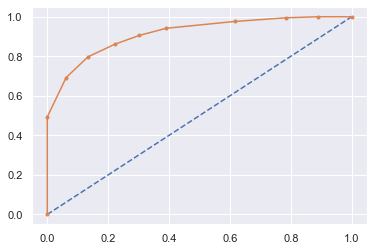

In [144]:
# AUC and ROC for the training data

# predict probabilities
probs = KNN.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

auc = roc_auc_score(y_train, probs)
print('AUC for the Train dataset: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()

AUC for the Train dataset: 0.892


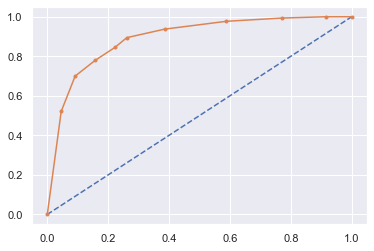

In [145]:
# AUC and ROC for the testing data

# predict probabilities
probs = KNN.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

auc = roc_auc_score(y_test, probs)
print('AUC for the Train dataset: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()

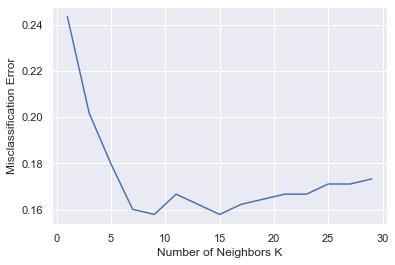

In [146]:
plt.plot(range(1,30,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

**We observed misclassification error is least when K value is 9 and 15.**

In [147]:
#Mean square error:
print('Mean square error-Train data:',mean_squared_error(y_train_predict_knn, y_train))
print('Mean square error-Test data:',mean_squared_error(y_test_predict_knn, y_test))

Mean square error-Train data: 0.15457115928369464
Mean square error-Test data: 0.15789473684210525


### K Nearest Neighbour Model Observations(k=9):

**Train data:**
* Accuracy: 84.54%
* Precision: 87%
* Recall: 89%
* F1-Score: 88%
* Mean square error(MSE):  0.154
* AUC:0.913
     

**Test data:**
* Accuracy: 84.21%
* Precision: 87%
* Recall: 89%
* F1-Score: 88%
* Mean square error(MSE): 0.157
* AUC: 0.892 


**Validness of the model:**
* The model is not over-fitted or under-fitted.
* The error in the test data is slightly lesser than the train data, which is absolutely fine because the error margin is low and the error in both train and test data is not too high. Thus, the model is not over-fitted or under-fitted.

## Naive Bayes:

In [148]:
NB_model=GaussianNB()
NB_model.fit(x_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [149]:
#Train data prediction
y_train_predict_nb=NB_model.predict(x_train)
model_score_nb=NB_model.score(x_train, y_train)

print(model_score_nb)
print(metrics.confusion_matrix(y_train,y_train_predict_nb))

print(metrics.classification_report(y_train,y_train_predict_nb))

0.8350612629594723
[[211  96]
 [ 79 675]]
              precision    recall  f1-score   support

         0.0       0.73      0.69      0.71       307
         1.0       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



AxesSubplot(0.125,0.125;0.62x0.755)


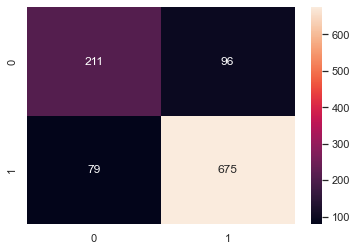

In [150]:
print(sns.heatmap(confusion_matrix(y_train,y_train_predict_nb),annot=True , fmt="2g"))

AUC for the Test dataset: 0.876


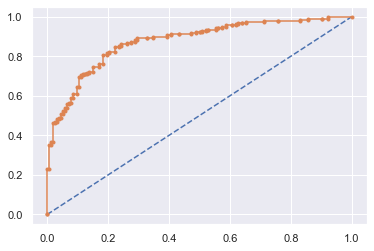

In [151]:
# AUC and ROC for the testing data

# predict probabilities
probs = NB_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

auc = roc_auc_score(y_test, probs)
print('AUC for the Test dataset: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()

In [152]:
#Test data prediction
y_test_predict_nb=NB_model.predict(x_test)
model_score_nb=NB_model.score(x_test, y_test)

print(model_score_nb)
print(metrics.confusion_matrix(y_test,y_test_predict_nb))

print(metrics.classification_report(y_test,y_test_predict_nb))

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

         0.0       0.74      0.73      0.73       153
         1.0       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



AxesSubplot(0.125,0.125;0.62x0.755)


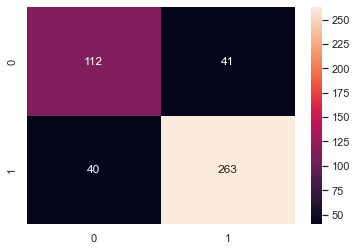

In [153]:
print(sns.heatmap(confusion_matrix(y_test,y_test_predict_nb),annot=True , fmt="2g"))

AUC for the Train dataset: 0.888


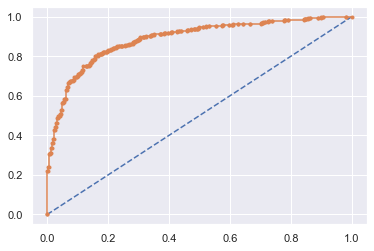

In [154]:
# AUC and ROC for the training data

# predict probabilities
probs = NB_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

auc = roc_auc_score(y_train, probs)
print('AUC for the Train dataset: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()

In [155]:
#Mean square error:
print('Mean square error-Train data:',mean_squared_error(y_train_predict_nb, y_train))
print('Mean square error-Test data:',mean_squared_error(y_test_predict_nb, y_test))

Mean square error-Train data: 0.1649387370405278
Mean square error-Test data: 0.17763157894736842


### Naive Bayes Model Observations(k=9):

**Train data:**
* Accuracy: 83.5%
* Precision: 88%
* Recall: 90%
* F1-Score: 89%
* Mean square error(MSE):  0.165
* AUC:0.888
     

**Test data:**
* Accuracy: 82.23%
* Precision: 87%
* Recall: 87%
* F1-Score: 87%
* Mean square error(MSE): 0.177
* AUC: 0.876
 

**Validness of the model:**
* The model is not over-fitted or under-fitted.
* The error in the test data is slightly higher than the train data, which is absolutely fine because the error margin is low and the error in both train and test data is not too high. Thus, the model is not over-fitted or under-fitted.

# 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

Tuning is the process of maximizing a model’s performance without overfitting or creating too high of a variance. In machine learning, this is accomplished by selecting appropriate “hyperparameters.”

Hyperparameters can be thought of as the “dials” or “knobs” of a machine learning model. Choosing an appropriate set of hyperparameters is crucial for model accuracy, but can be computationally challenging. Hyperparameters differ from other model parameters in that they are not learned by the model automatically through training methods. Instead, these parameters must be set manually. Many methods exist for selecting appropriate hyperparameters. This post focuses on three:

* Grid Search
* Random Search
* Bayesian Optimization

## Model Tuning:


### Logistic Regression

In [156]:
param_grid = {
    'C' : [0.5,0.6,0.7],
    'max_iter' : [100,1000,10000],
    'penalty' : ['l1','none'],
    'solver': ['newton-cg','liblinear'],
    'tol':[0.0001]
}

In [157]:
Lg_model=LogisticRegression()
grid_search=GridSearchCV(estimator=Lg_model,param_grid=param_grid)
grid_search.fit(x_train,y_train)

Lg_model=grid_search.best_estimator_
Lg_model.fit(x_train,y_train)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='n

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector

LogisticRegression(C=0.7, max_iter=10000, penalty='l1', solver='liblinear')

In [158]:
Lg_model=grid_search.best_estimator_

In [159]:
Lg_model.fit(x_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.7, max_iter=10000, penalty='l1', solver='liblinear')

In [160]:
## Performance Matrix on train data set
y_train_predict_lg = Lg_model.predict(x_train)

model_score = Lg_model.score(x_train, y_train)

print('Model score of Train data is:',model_score)

print(confusion_matrix(y_train, y_train_predict_lg))
print(classification_report(y_train, y_train_predict_lg))

Model score of Train data is: 0.8360037700282752
[[193 114]
 [ 60 694]]
              precision    recall  f1-score   support

         0.0       0.76      0.63      0.69       307
         1.0       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.77      0.79      1061
weighted avg       0.83      0.84      0.83      1061



In [161]:
## Performance Matrix on test data set
y_test_predict_lg = Lg_model.predict(x_test)

model_score = Lg_model.score(x_test, y_test)

print('Model score of Test data is:',model_score)

print(confusion_matrix(y_test, y_test_predict_lg))
print(classification_report(y_test, y_test_predict_lg))

Model score of Train data is: 0.8267543859649122
[[110  43]
 [ 36 267]]
              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74       153
         1.0       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



**We are trying further to get the best parameters**

In [162]:

param_grid = {
    'C' : [0.6, 0.62],
    'max_iter' : [100],
    'penalty' : ['l1'],
    'solver': ['liblinear'],
    'tol':[0.0001]
}

Lg_model=LogisticRegression()

grid_search=GridSearchCV(estimator=Lg_model,param_grid=param_grid)

grid_search.fit(x_train,y_train)

Lg_model=grid_search.best_estimator_
Lg_model.fit(x_train,y_train)



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

LogisticRegression(C=0.62, penalty='l1', solver='liblinear')

In [163]:


## Performance Matrix on train data set
y_train_predict_lg = Lg_model.predict(x_train)

lg_model_score = Lg_model.score(x_train, y_train)

print('Model score of Train data is:',lg_model_score)

print(confusion_matrix(y_train, y_train_predict_lg))
print(classification_report(y_train, y_train_predict_lg))

Model score of Train data is: 0.8360037700282752
[[193 114]
 [ 60 694]]
              precision    recall  f1-score   support

         0.0       0.76      0.63      0.69       307
         1.0       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.77      0.79      1061
weighted avg       0.83      0.84      0.83      1061



In [164]:
## Performance Matrix on test data set
y_test_predict_lg = Lg_model.predict(x_test)

lg_model_score_test = Lg_model.score(x_test, y_test)

print('Model score of Train data is:',lg_model_score_test)

print(confusion_matrix(y_test, y_test_predict_lg))
print(classification_report(y_test, y_test_predict_lg))

Model score of Train data is: 0.8267543859649122
[[110  43]
 [ 36 267]]
              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74       153
         1.0       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



In [165]:
#Mean square error-Train data without tuning: 0.16870876531573986
#Mean square error-Test data without tuning: 0.16447368421052633

#Mean square error:
print('Mean square error-Train data:',mean_squared_error(y_train_predict_lg, y_train))
print('Mean square error-Test data:',mean_squared_error(y_test_predict_lg, y_test))

Mean square error-Train data: 0.16399622997172478
Mean square error-Test data: 0.17324561403508773


### Observation:
#### For training data, we could see the improvement in the score of Linear Regression model after tuning. Before Tuning the score was 0.83 and score after tuning is 0.84
##### But for testing data, we could not see the any improvements. Model scoring before tuning was 0.84 and after tuning is 0.83
#### Overall there is no much difference noticed in the model. The values are high overall and there is no over-fitting or under-fitting. Therefore both models are equally good models.
-------------------------------------------------------------------------------------------------------------------


### Linear Discriminant Analysis Model Tuning:

Linear Discriminant Analysis(LDA) - Observation before Tuning:

Train data:
Accuracy: 83.41%
Precision: 91%
Recall: 86%
F1-Score: 89%
Mean square error(MSE): 0.166


Test data:
Accuracy: 83.33%
Precision: 89%
Recall: 86%
F1-Score: 88%
Mean square error(MSE): 0.166

In [166]:
import sklearn.model_selection
sklearn.model_selection.KFold

param_grid = {"solver" : ["svd"],
              "tol" : [0.0001,0.0002,0.0003]
}

In [167]:
ldat = LinearDiscriminantAnalysis()

In [168]:
kfold = model_selection.KFold(n_splits=10)

grid_search_lda=GridSearchCV(ldat, param_grid = param_grid, cv=kfold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

grid_search_lda.fit(x_train,y_train)

lda_best_model=grid_search_lda.best_estimator_

lda_best_model.fit(x_train,y_train)





Fitting 10 folds for each of 3 candidates, totalling 30 fits


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

In [169]:
## Performance Matrix on train data set
y_train_predict_lda_t = lda_best_model.predict(x_train)

model_score = lda_best_model.score(x_train, y_train)

print('Model score of Train data is:',model_score)

print(confusion_matrix(y_train, y_train_predict_lda_t))
print(classification_report(y_train, y_train_predict_lda_t))

Model score of Train data is: 0.8341187558906692
[[200 107]
 [ 69 685]]
              precision    recall  f1-score   support

         0.0       0.74      0.65      0.69       307
         1.0       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [170]:
## Performance Matrix on test data set
y_test_predict_lda_t = lda_best_model.predict(x_test)

model_score = lda_best_model.score(x_test, y_test)

print('Model score of Test data is:',model_score)

print(confusion_matrix(y_test, y_test_predict_lda_t))
print(classification_report(y_test, y_test_predict_lda_t))

Model score of Test data is: 0.8333333333333334
[[111  42]
 [ 34 269]]
              precision    recall  f1-score   support

         0.0       0.77      0.73      0.74       153
         1.0       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456




### Observation:

**Train data:**
* Accuracy: 83.41%
* Precision: 86%
* Recall: 91%
* F1-Score: 89%
   

**Test data:**
* Accuracy: 83.33%
* Precision: 86%
* Recall: 89%
* F1-Score: 88%


#### Overall there is no much difference noticed in the model except the values of Precision, Recall and F1-score. The values are high overall and there is no over-fitting or under-fitting. Therefore both models are equally good models.
-------------------------------------------------------------------------------------------------------------------



## K-Nearest Neighbour Model Tuning:

K Nearest Neighbour Model Observations(k=9):

**Train data:**
Accuracy: 84.54%
Precision: 87%
Recall: 89%
F1-Score: 88%

**Test data:**
Accuracy: 84.21%
Precision: 87%
Recall: 89%
F1-Score: 88%

In [171]:


param_grid = {"n_neighbors" : [5,7,9,11,13,15,17,19],
              "leaf_size" : [15,30],
              "weights" : ['uniform']
}

In [172]:

knn_model=KNeighborsClassifier()

grid_search=GridSearchCV(estimator=knn_model,param_grid=param_grid)
grid_search.fit(x_train,y_train)

knn_best_model=grid_search.best_estimator_
knn_best_model.fit(x_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

KNeighborsClassifier(leaf_size=15, n_neighbors=19)

In [283]:
## Performance Matrix on train data set
y_train_predict_knn_t = knn_best_model.predict(x_train)

model_score_knn_t = knn_best_model.score(x_train, y_train)

print('Model score of Train data is:',model_score_knn_t)

print(confusion_matrix(y_train, y_train_predict_knn_t))
print(classification_report(y_train, y_train_predict_knn_t))

Model score of Train data is: 0.8350612629594723
[[195 112]
 [ 63 691]]
              precision    recall  f1-score   support

         0.0       0.76      0.64      0.69       307
         1.0       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



In [174]:
## Performance Matrix on test data set
y_test_predict_knn_T = knn_best_model.predict(x_test)

model_score_knn_test = knn_best_model.score(x_test, y_test)

print('Model score of Test data is:',model_score_knn_test)

print(confusion_matrix(y_test, y_test_predict_knn_T))
print(classification_report(y_test, y_test_predict_knn_T))

Model score of Test data is: 0.8355263157894737
[[105  48]
 [ 27 276]]
              precision    recall  f1-score   support

         0.0       0.80      0.69      0.74       153
         1.0       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



### K Nearest Neighbour Model after tuning Observations:

**Train data:**
* Accuracy: 83.504%
* Precision: 86%
* Recall: 92%
* F1-Score: 89%
   

**Test data:**
* Accuracy: 83.55%
* Precision: 85%
* Recall: 91%
* F1-Score: 88%



#### For Testing data, we could see the improvement in the score of KNN model after tuning. Before Tuning the score was 0.8201 and score after tuning is 0.8355
#### But for Training data, we could not see the any improvements. Model scoring before tuning was 0.8567 and after tuning is 0.8350
#### Overall there is no much difference noticed in the model. The values are high overall and there is no over-fitting or under-fitting. Therefore both models are equally good models.
#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



## Bagging

### Random Forest Classifier without Bagging 

In [175]:
param_grid = {
    'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20],
    'random_state' : [0]
}

In [176]:
RF_model=RandomForestClassifier()

In [177]:
grid_search=GridSearchCV(estimator=RF_model,param_grid=param_grid,cv=10)

In [178]:
grid_search.fit(x_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [0]})

In [179]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=15, min_samples_split=30,
                       random_state=0)

In [180]:
RF_model=grid_search.best_estimator_

In [181]:
RF_model.fit(x_train, y_train)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11624\1308253992.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(x_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=15, min_samples_split=30,
                       random_state=0)

In [182]:
## Performance Matrix on train data set
y_train_predict_RF = RF_model.predict(x_train)
model_score =RF_model.score(x_train, y_train)
print(model_score)
print( confusion_matrix(y_train, y_train_predict_RF))
print( classification_report(y_train, y_train_predict_RF))

0.8576814326107446
[[202 105]
 [ 46 708]]
              precision    recall  f1-score   support

         0.0       0.81      0.66      0.73       307
         1.0       0.87      0.94      0.90       754

    accuracy                           0.86      1061
   macro avg       0.84      0.80      0.82      1061
weighted avg       0.85      0.86      0.85      1061



AxesSubplot(0.125,0.125;0.62x0.755)


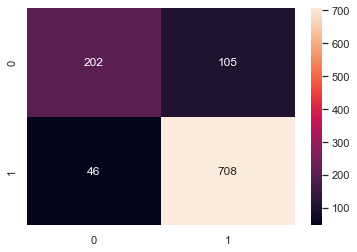

In [183]:
print(sns.heatmap(confusion_matrix(y_train,y_train_predict_RF),annot=True , fmt="2g"))

AUC: 0.918


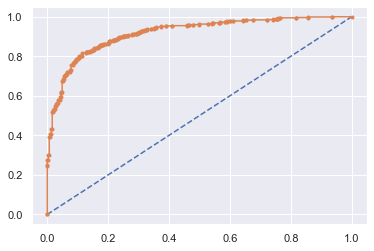

In [184]:
# AUC and ROC for the training data

# predict probabilities
probs = RF_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [185]:
## Performance Matrix on test data set
y_test_predict_RF = RF_model.predict(x_test)
model_score = RF_model.score(x_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict_RF))
print( classification_report(y_test, y_test_predict_RF))

0.8179824561403509
[[ 93  60]
 [ 23 280]]
              precision    recall  f1-score   support

         0.0       0.80      0.61      0.69       153
         1.0       0.82      0.92      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.77      0.78       456
weighted avg       0.82      0.82      0.81       456



AxesSubplot(0.125,0.125;0.62x0.755)


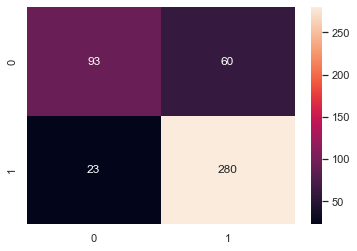

In [186]:
print(sns.heatmap(confusion_matrix(y_test,y_test_predict_RF),annot=True , fmt="2g"))

AUC: 0.891


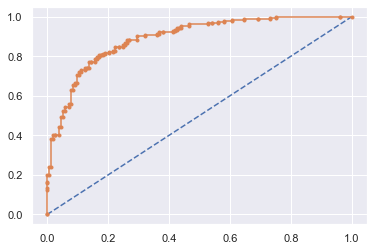

In [187]:
# predict probabilities
probs = RF_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

**We observed quite good results from the model with tuning. Now lets apply bagging on the Random forest**

### Random Forest Classifier with Bagging

In [188]:
cart=RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100, random_state=1)

Bagging_model.fit(x_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [189]:
#Training data prediction
y_train_predict_RFB=Bagging_model.predict(x_train)
Bagging_model_score=Bagging_model.score(x_train,y_train)
print(Bagging_model_score)

print(metrics.confusion_matrix(y_train,y_train_predict_RFB))
print(metrics.classification_report(y_train,y_train_predict_RFB))

0.9660697455230914
[[277  30]
 [  6 748]]
              precision    recall  f1-score   support

         0.0       0.98      0.90      0.94       307
         1.0       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



AxesSubplot(0.125,0.125;0.62x0.755)


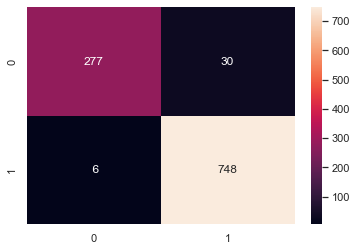

In [190]:
print(sns.heatmap(confusion_matrix(y_train,y_train_predict_RFB),annot=True , fmt="2g"))

AUC: 0.997


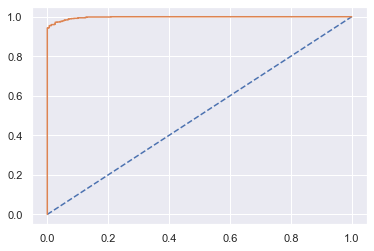

In [191]:
#AUC ROC Curve for Bagging (Train data )
probs = Bagging_model.predict_proba(x_train)

probs = probs[:, 1]

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

In [192]:
#Test Data prediction
y_test_predict_RFB=Bagging_model.predict(x_test)
Bagging_model_score=Bagging_model.score(x_test,y_test)
print(Bagging_model_score)

print(metrics.confusion_matrix(y_test,y_test_predict_RFB))
print(metrics.classification_report(y_test,y_test_predict_RFB))

0.8289473684210527
[[104  49]
 [ 29 274]]
              precision    recall  f1-score   support

         0.0       0.78      0.68      0.73       153
         1.0       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



AxesSubplot(0.125,0.125;0.62x0.755)


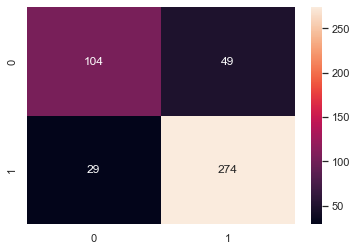

In [193]:
print(sns.heatmap(confusion_matrix(y_test,y_test_predict_RFB),annot=True , fmt="2g"))

AUC: 0.896


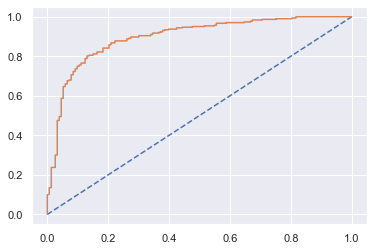

In [194]:
#AUC ROC Curve for Bagging (Test data )
probs_test = Bagging_model.predict_proba(x_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

### Random Forest Classification model obdervation:

**Train data:**
* Accuracy: 85.76%
* Precision: 87%
* Recall: 94%
* F1-Score: 90%
* AUC : 0.918
 
 

**Test data:**
* Accuracy: 81.79%
* Precision: 82%
* Recall: 92%
* F1-Score: 87%
* AUC: 0.891


### Random Forest Classification model obdervation (After Bagging):

**Train data:**
* Accuracy: 96.60%
* Precision: 96%
* Recall: 99%
* F1-Score: 98%
* AUC : 0.997
 


**Test data:**
* Accuracy: 82.89%
* Precision: 85%
* Recall: 90%
* F1-Score: 88%
* AUC: 0.896



#### For Training data, we could see the improvement in the score of RF model after Bagging. Before Bagging, the score was 85.76 and score after Bagging is 0.9660
#### But for Testing data, we could not see significant improvements. Model scoring before Bagging was 0.8179 and after Bagging is 0.8289
#### The model after Bagging can be considered as Over-fitted model as we can see, the train data has a 96.60% accuracy and test data has 82.89% accuracy. The difference is more than 10%. So, we can infer that the Bagging model is over-fitted.

### ------------------------------------------------------------------------------------------------------------------------------------------------------


## Boosting

### Ada Boosting

In [195]:
ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(x_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(n_estimators=100, random_state=1)

In [196]:
## Performance Matrix on train data set
y_train_predict_adb=ADB_model.predict(x_train)

ADB_model_score=ADB_model.score(x_train,y_train)
print(ADB_model_score)

print(metrics.confusion_matrix(y_train,y_train_predict_adb))
print(metrics.classification_report(y_train,y_train_predict_adb))

0.8501413760603205
[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73       307
         1.0       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



AxesSubplot(0.125,0.125;0.62x0.755)


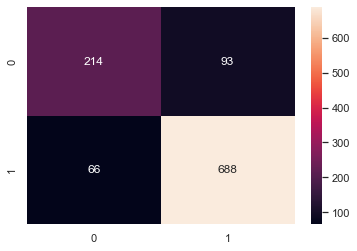

In [197]:
print(sns.heatmap(confusion_matrix(y_train,y_train_predict_adb),annot=True , fmt="2g"))

AUC: 0.915


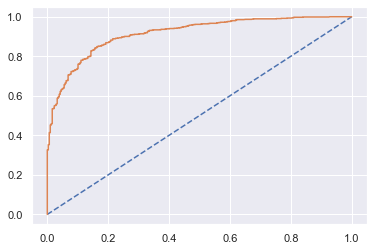

In [198]:
# AUC and ROC for the train data
probs = ADB_model.predict_proba(x_train)

probs = probs[:, 1]

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

In [199]:
## Performance Matrix on test data set

y_test_predict_adb=ADB_model.predict(x_test)

ADB_model_score=ADB_model.score(x_test,y_test)
print(ADB_model_score)

print(metrics.confusion_matrix(y_test,y_test_predict_adb))
print(metrics.classification_report(y_test,y_test_predict_adb))

0.8135964912280702
[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

         0.0       0.75      0.67      0.71       153
         1.0       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



AxesSubplot(0.125,0.125;0.62x0.755)


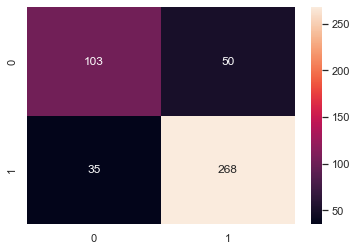

In [200]:
print(sns.heatmap(confusion_matrix(y_test,y_test_predict_adb),annot=True , fmt="2g"))

AUC: 0.877


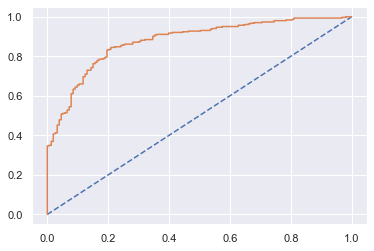

In [201]:
# AUC and ROC for the test data
probs = ADB_model.predict_proba(x_test)

probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr)

### ADA Boosting model obdervation:

**Train data:**
* Accuracy: 85.01%
* Precision: 88%
* Recall: 91%
* F1-Score: 90%
* AUC : 0.915
 

**Test data:**
* Accuracy: 81.35%
* Precision: 84%
* Recall: 88%
* F1-Score: 86%
* AUC: 0.877

#### From the above data we can consider the model as overfit model as we found decreased acuracy while testing the model with test data.


## Gradient Boosting

In [202]:
gbc_model=GradientBoostingClassifier(random_state=1)
gbc_model.fit(x_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=1)

In [203]:
#GB boosting Train
y_train_predict_gb = gbc_model.predict(x_train)

gbc_model_score = gbc_model.score(x_train, y_train)
print(gbc_model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_gb))
print(metrics.classification_report(y_train, y_train_predict_gb))

0.8925541941564562
[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

         0.0       0.84      0.78      0.81       307
         1.0       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



AxesSubplot(0.125,0.125;0.62x0.755)


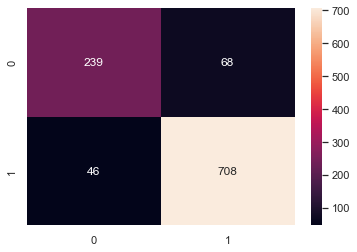

In [204]:
print(sns.heatmap(confusion_matrix(y_train,y_train_predict_gb),annot=True , fmt="2g"))

AUC: 0.951


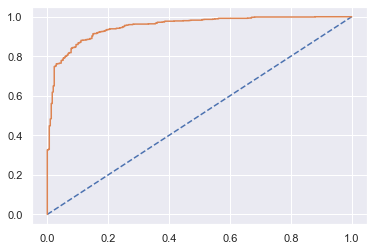

In [205]:
#AUC _ROC Curve Boosting Train
probs = gbc_model.predict_proba(x_train)

probs = probs[:, 1]

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

In [206]:
#GB boosting test
y_test_predict_gb = gbc_model.predict(x_test)
gbc_model_score = gbc_model.score(x_test, y_test)
print(gbc_model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_gb))
print(metrics.classification_report(y_test, y_test_predict_gb))

0.8333333333333334
[[104  49]
 [ 27 276]]
              precision    recall  f1-score   support

         0.0       0.79      0.68      0.73       153
         1.0       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



AxesSubplot(0.125,0.125;0.62x0.755)


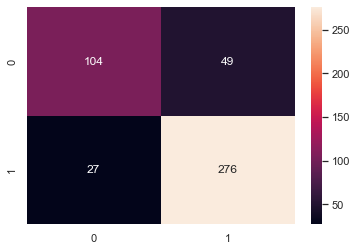

In [207]:
print(sns.heatmap(confusion_matrix(y_test,y_test_predict_gb),annot=True , fmt="2g"))

AUC: 0.899


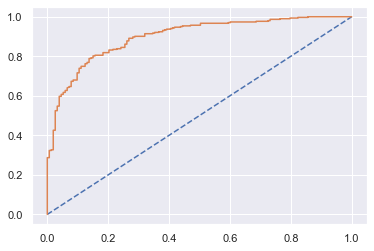

In [208]:
#AUC ROC curve boosting Test

probs_test = gbc_model.predict_proba(x_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr)

### Gradient Boosting model obdervation:

**Train data:**
* Accuracy: 89.25%
* Precision: 91%
* Recall: 94%
* F1-Score: 93%
* AUC : 0.951
 


**Test data:**
* Accuracy: 83.33%
* Precision: 85%
* Recall: 91%
* F1-Score: 88%
* AUC: 0.899
    
     

#### The accuracy in the test data is slightly lesser than the train data, which is absolutely fine because the error margin is low and the error in both train and test data is not too high. Thus, the model is not over-fitted or under-fitted.


# 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

### Logistic Regression Model - Regular:

In [209]:
## Getting the probabilities on the train set
#Predicted Class and probs:

ytest_predict_prob=Logistic_model.predict_proba(x_train)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.931825,0.068175
1,0.096984,0.903016
2,0.298416,0.701584
3,0.110210,0.889790
4,0.017223,0.982777


In [210]:
#Score of the LR model Train data
print('Acuracy of LR model-Traning data:',Logistic_model_score)

Acuracy of LR model-Traning data: 0.8312912346842601


[[196 111]
 [ 68 686]]
AxesSubplot(0.125,0.125;0.62x0.755)


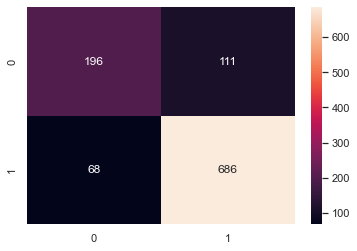

In [211]:
#confusion matrix and heat map representation of Train data 
print(metrics.confusion_matrix(y_train,y_train_predict_lr))
print(sns.heatmap(confusion_matrix(y_train,y_train_predict_lr),annot=True , fmt="2g"))

AUC for the Train dataset: 0.890


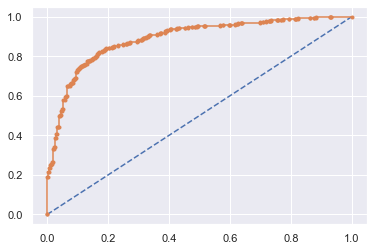

In [212]:
# AUC and ROC for the training data

# predict probabilities
probs = Logistic_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_train, probs)
print('AUC for the Train dataset: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [213]:
## Getting the probabilities on the test set
#Predicted Class and probs:

ytest_predict_prob_test=Logistic_model.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob_test).head()

,0,1
0,0.424284,0.575716
1,0.148426,0.851574
2,0.007187,0.992813
3,0.836350,0.163650
4,0.068407,0.931593


In [214]:
#Score of the LR model Test data
print('Acuracy of LR model-Testing data:',Logistic_model_score_test)

Acuracy of LR model-Testing data: 0.8355263157894737


[[113  40]
 [ 35 268]]
AxesSubplot(0.125,0.125;0.62x0.755)


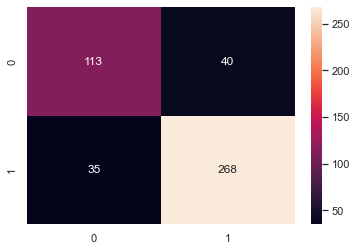

In [215]:
#confusion matrix and heat map representation of Test data
print(metrics.confusion_matrix(y_test,y_test_predict_lr))

print(sns.heatmap(confusion_matrix(y_test,y_test_predict_lr),annot=True , fmt="2g"))

AUC for Test dataset is: 0.883


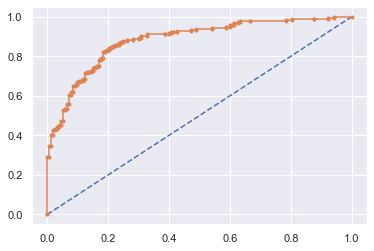

In [216]:
# AUC and ROC for the training data

# predict probabilities
probs = Logistic_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC for Test dataset is: %.3f' % auc)

# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Logistic Regression Model - Tuned

In [217]:
# Getting the probabilities on the Train set
#Predicted Class and probs:
predict_prob_train=Lg_model.predict_proba(x_train)
pd.DataFrame(predict_prob_train).head()

,0,1
0,0.923052,0.076948
1,0.120611,0.879389
2,0.288058,0.711942
3,0.130536,0.869464
4,0.024460,0.975540


In [218]:
#Score of the LR model Train data
print('Acuracy of tuned LR model-Testing data:',lg_model_score)

Acuracy of tuned LR model-Testing data: 0.8360037700282752


[[193 114]
 [ 60 694]]
AxesSubplot(0.125,0.125;0.62x0.755)


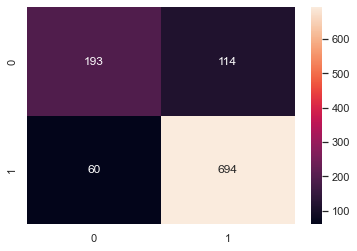

In [219]:
#confusion matrix and heat map representation of Train data
print(confusion_matrix(y_train, y_train_predict_lg))

print(sns.heatmap(confusion_matrix(y_train,y_train_predict_lg),annot=True , fmt="2g"))

AUC for the Train dataset: 0.890


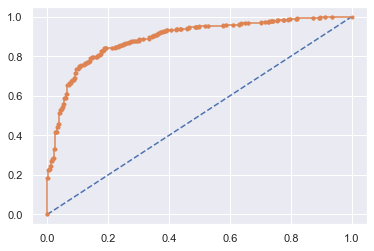

In [220]:
# AUC and ROC for the training data

# predict probabilities
probs = Lg_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_train, probs)
print('AUC for the Train dataset: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [221]:
## Getting the probabilities on the Test set
#Predicted Class and probs:

predict_prob_test=Lg_model.predict_proba(x_test)
pd.DataFrame(predict_prob_test).head()

,0,1
0,0.406675,0.593325
1,0.157642,0.842358
2,0.008769,0.991231
3,0.818165,0.181835
4,0.089828,0.910172


In [222]:

#Score of the LR model Test data
print('Acuracy of tuned LR model-Testing data:',lg_model_score_test)


Acuracy of tuned LR model-Testing data: 0.8267543859649122


[[110  43]
 [ 36 267]]
AxesSubplot(0.125,0.125;0.62x0.755)


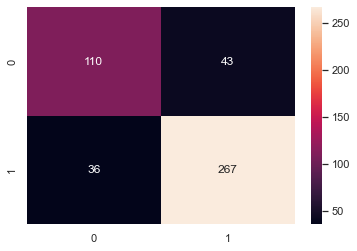

In [223]:
#confusion matrix and heat map representation of Testing data
print(confusion_matrix(y_test, y_test_predict_lg))
print(sns.heatmap(confusion_matrix(y_test,y_test_predict_lg),annot=True , fmt="2g"))

AUC for the Train dataset: 0.880


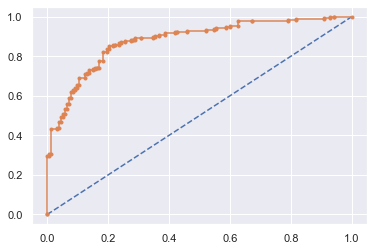

In [224]:
# AUC and ROC for the testing data

# predict probabilities
probs = Lg_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, probs)
print('AUC for the Train dataset: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Comparision between the regular LR model and tuned LR model:

* For training data, we could see the improvement in the score of Linear Regression model after tuning. Before Tuning the score was 0.83 and score after tuning is 0.84
* But for testing data, we could not see the any improvements. Model scoring before tuning was 0.84 and after tuning is 0.83
* Train Data AUC before Tuning: 0.89
* Train Data AUC After Tuning: 0.89
* Test Data AUC before Tuning: 0.883
* Test Data AUC After Tuning: 0.88
* Overall there is no much difference noticed in the model. The values are high overall and there is no over-fitting or under-fitting. Therefore both models are equally good models.
-------------------------------------------------------------------------------------------------------------------


## LDA Model without Tuning:

In [225]:
## Getting the probabilities on the Train set
#Predicted Class and probs:

predict_prob_train=lda.predict_proba(x_train)
pd.DataFrame(predict_prob_train).head()

,0,1
0,0.949216,0.050784
1,0.078241,0.921759
2,0.307389,0.692611
3,0.078963,0.921037
4,0.012161,0.987839


In [226]:
#Score of the LDA model Test data
print('Acuracy of tuned LDA model-Training data:',LDA_score_train)

Acuracy of tuned LDA model-Training data: 0.8341187558906692


[[200 107]
 [ 69 685]]
AxesSubplot(0.125,0.125;0.62x0.755)


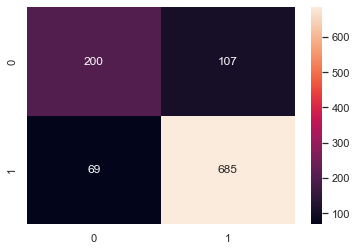

In [227]:
#confusion matrix and heat map representation of Train data
print(confusion_matrix(y_train, y_train_predict_lda))
print(sns.heatmap(confusion_matrix(y_train,y_train_predict_lda),annot=True , fmt="2g"))

AUC for the Train dataset: 0.889


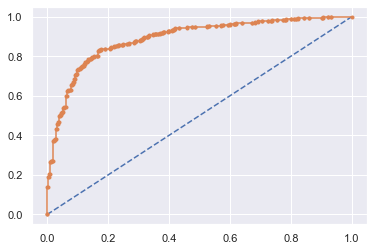

In [228]:
# AUC and ROC for the training data

# predict probabilities
probs = lda.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_train, probs)
print('AUC for the Train dataset: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [229]:
## Getting the probabilities on the Test set
#Predicted Class and probs:

predict_prob_test=lda.predict_proba(x_test)
pd.DataFrame(predict_prob_test).head()

,0,1
0,0.462093,0.537907
1,0.133955,0.866045
2,0.006414,0.993586
3,0.861210,0.138790
4,0.056545,0.943455


In [230]:
#Score of the LDA model Test data
print('Acuracy of tuned LDA model-Testing data:',LDA_score_test)

Acuracy of tuned LDA model-Testing data: 0.8333333333333334


[[111  42]
 [ 34 269]]
AxesSubplot(0.125,0.125;0.62x0.755)


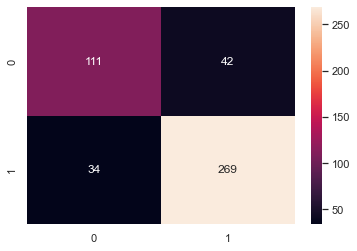

In [231]:
#confusion matrix and heat map representation of Train data
print(confusion_matrix(y_test, y_test_predict_lda))
print(sns.heatmap(confusion_matrix(y_test,y_test_predict_lda),annot=True , fmt="2g"))

AUC for the Train dataset: 0.888


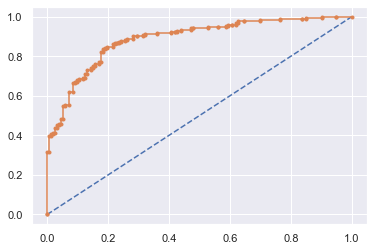

In [232]:
# AUC and ROC for the testing data

# predict probabilities
probs = lda.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, probs)
print('AUC for the Train dataset: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## LDA Model with Tuning:

In [233]:
## Getting the probabilities on the Train set
#Predicted Class and probs:

predict_prob_train=lda_best_model.predict_proba(x_train)
pd.DataFrame(predict_prob_train).head()

,0,1
0,0.949216,0.050784
1,0.078241,0.921759
2,0.307389,0.692611
3,0.078963,0.921037
4,0.012161,0.987839


In [234]:
## Performance Matrix on train data set
y_train_predict_lda_t = lda_best_model.predict(x_train)

model_score = lda_best_model.score(x_train, y_train)

print('LDA Model score of Train data is:',model_score)

LDA Model score of Train data is: 0.8341187558906692


[[200 107]
 [ 69 685]]
AxesSubplot(0.125,0.125;0.62x0.755)


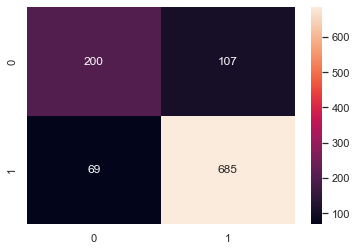

In [235]:

print(confusion_matrix(y_train, y_train_predict_lda_t))
print(sns.heatmap(confusion_matrix(y_train,y_train_predict_lda_t),annot=True , fmt="2g"))

AUC for the Train dataset: 0.889


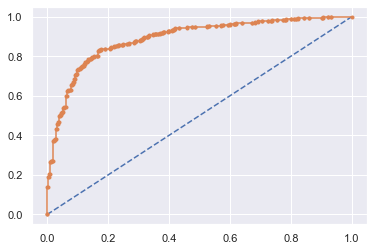

In [236]:
# AUC and ROC for the training data

# predict probabilities
probs = lda_best_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC for the Train dataset: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [237]:
## Getting the probabilities on the Test set
#Predicted Class and probs:

predict_prob_test=lda_best_model.predict_proba(x_test)
pd.DataFrame(predict_prob_train).head()

,0,1
0,0.949216,0.050784
1,0.078241,0.921759
2,0.307389,0.692611
3,0.078963,0.921037
4,0.012161,0.987839


In [238]:

y_test_predict_lda_t = lda_best_model.predict(x_test)

model_score = lda_best_model.score(x_test, y_test)

print('LDA Model score of Train data is:',model_score)

LDA Model score of Train data is: 0.8333333333333334


[[111  42]
 [ 34 269]]
AxesSubplot(0.125,0.125;0.62x0.755)


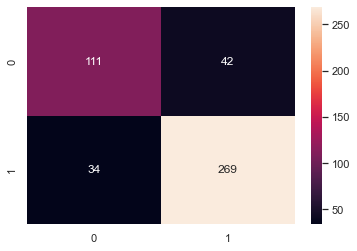

In [239]:
## Performance Matrix on train data set
print(confusion_matrix(y_test, y_test_predict_lda_t))
print(sns.heatmap(confusion_matrix(y_test,y_test_predict_lda_t),annot=True , fmt="2g"))

AUC for the Train dataset: 0.888


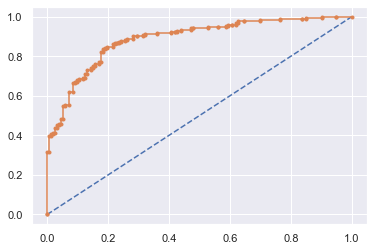

In [240]:
# AUC and ROC for the testing data

# predict probabilities
probs = lda_best_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC for the Train dataset: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


### Logistic Regression Model without tuning Observation:

**Train data:**
* Accuracy: 83.41%
* Precision: 86%
* Recall: 91%
* F1-Score: 89%
* AUC: 0.889
   

**Test data:**
* Accuracy: 83.33%
* Precision: 86%
* Recall: 89%
* F1-Score: 88%
* AUC:0.888


### Logistic Regression Model with tuning Observation:

**Train data:**
* Accuracy: 83.12%
* Precision: 86%
* Recall: 91%
* F1-Score: 88%
* Mean square error(MSE): 0.16870876531573986
* AUC:0.890

**Test data:**
* Accuracy: 83.55%
* Precision: 87%
* Recall: 88%
* F1-Score: 88%
* Mean square error(MSE): 0.16447368421052633
* AUC: 0.883

**Validness of the model:**
* The model is not over-fitted or under-fitted.
* The error in the test data is slightly higher than the train data, which is absolutely fine because the error margin is low and the error in both train and test data is not too high. Thus, the model is not over-fitted or under-fitted.
    
    
    
### Comparision between regular and tuned LDA models: 
##### Overall there is no much difference noticed in the model except the values of Precision, Recall and F1-score. The values are high overall and there is no over-fitting or under-fitting. Therefore both models are equally good models.
-----------------------------------------------------------------------------------------------------



### KNN Model - Regular

In [241]:
print('KNN Model score of Train data is:',KNN_score_train)

KNN Model score of Train data is: 0.8454288407163054


[[214  93]
 [ 71 683]]
AxesSubplot(0.125,0.125;0.62x0.755)


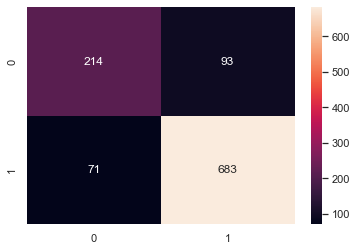

In [242]:
## Performance Matrix on train data set
print(confusion_matrix(y_train, y_train_predict_knn))
print(sns.heatmap(confusion_matrix(y_train,y_train_predict_knn),annot=True , fmt="2g"))

AUC for the Train dataset: 0.913


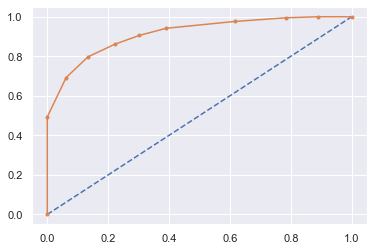

In [243]:
# AUC and ROC for the training data

# predict probabilities
probs = KNN.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC for the Train dataset: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [244]:
print('KNN Model score of Test data is:',KNN_score_test)

KNN Model score of Test data is: 0.8421052631578947


[[113  40]
 [ 32 271]]
AxesSubplot(0.125,0.125;0.62x0.755)


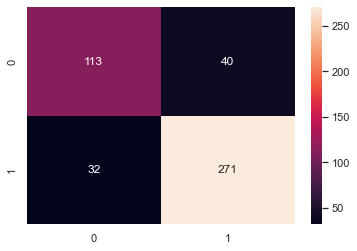

In [245]:
## Performance Matrix on test data set
print(confusion_matrix(y_test, y_test_predict_knn))
print(sns.heatmap(confusion_matrix(y_test,y_test_predict_knn),annot=True , fmt="2g"))

AUC for the Train dataset: 0.892


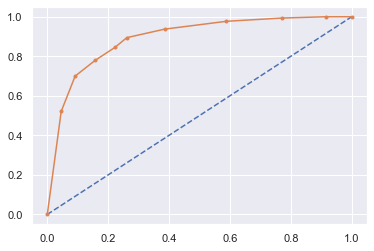

In [246]:
# AUC and ROC for the testing data

# predict probabilities
probs = KNN.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC for the Train dataset: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### KNN Model Tuning

In [247]:
print('KNN Model score of Train data is:',model_score_knn_t)

KNN Model score of Train data is: 0.8350612629594723


[[195 112]
 [ 63 691]]
AxesSubplot(0.125,0.125;0.62x0.755)


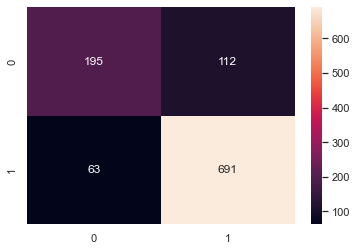

In [248]:
## Performance Matrix on train data set
print(confusion_matrix(y_train, y_train_predict_knn_t))
print(sns.heatmap(confusion_matrix(y_train,y_train_predict_knn_t),annot=True , fmt="2g"))

AUC for the Train dataset: 0.901


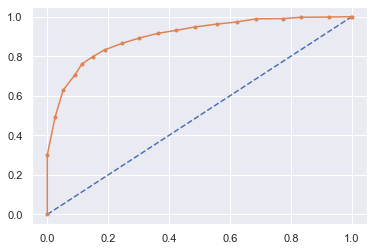

In [249]:
# AUC and ROC for the training data

# predict probabilities
probs = knn_best_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC for the Train dataset: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [250]:
print('KNN Model score of Testing data is:',model_score_knn_test)

KNN Model score of Testing data is: 0.8355263157894737


[[105  48]
 [ 27 276]]
AxesSubplot(0.125,0.125;0.62x0.755)


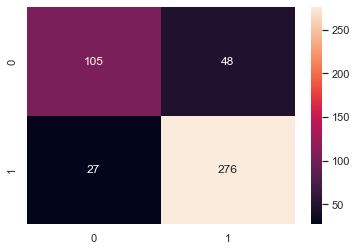

In [251]:
## Performance Matrix on Test data set
print(confusion_matrix(y_test, y_test_predict_knn_T))
print(sns.heatmap(confusion_matrix(y_test,y_test_predict_knn_T),annot=True , fmt="2g"))

AUC for the Train dataset: 0.894


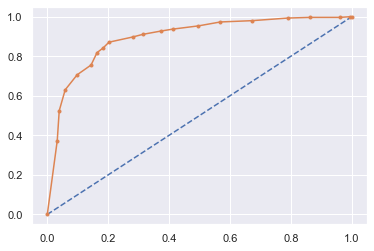

In [252]:
# AUC and ROC for the training data

# predict probabilities
probs = knn_best_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC for the Train dataset: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Comparision between regular KNN and Tuned KNN models:
**> For Testing data, we could see that  the score of KNN model remains almost same after tuning. Before Tuning the score was 0.8454 and score after tuning is 0.83506**

**> Also for testing data, we could not see the any improvements. Model scoring before tuning was 0.84210 and after tuning is 0.8355**

**> AUC is 0.913 and 0.892 for training and testing data correspondingly for regular KNN model.**

**> AUC is 0.901 and 0.894 for training and testing data correspondingly for KNN model after tuning.**

**> We found so significant difference in other parameters as well.**

**> Overall there is no much difference noticed in the model. The values are high overall and there is no over-fitting or under-fitting. Therefore both models are equally good models.**

## -------------------------------------------------------------------------------------------------------------

### Note:

* The Accuracy, Confusion Matrix, ROC curve plot and ROC_AUC score for Naïve Bayes Model is shown in Q. 1.5 above

* The Accuracy, Confusion Matrix, ROC curve plot and ROC_AUC score for regular Random Forest, Bagged Random Forest model, Ada boosting and gradient boosting models are shown in Q. 1.6 above

---------------------------------------------------------------------------------------------------------

Conclusion:
There is no under-fitting or over-fitting in any of thetuned models.
All the tuned models have high values and every model is good. But as we can see, the most consistent tuned model in both train and test data is the Gradient Boost model.
The tuned gradient boost model performs the best with 88.31% accuracy score in train and 87.28% accuracy score in test. Also it hasthe best AUC score of 94% inboth train and test data which is the highest of all the models.
It also has a precision score of 88% and recall of 94% which is also the highest of all the models. So, we conclude that Gradient Boost Tuned model is the best/optimized model.

# 1.8 Based on these predictions, what are the insights?

**Insights:**
* Labour party has more than double the votes of conservative party.
* Most number of people have given a score of 3 and 4 for the national economic condition and the average score is 3.245221
* Most number of people have given a score of 3 and 4 for the household economic condition and the average score is 3.137772
* Blair has higher number of votes than Hague and the scores are much better for Blair than for Hague.
* The average score of Blair is 3.335531 and the average score of Hague is 2.749506. So, here we can see that,Blair has a better score.
* On a scale of 0 to 3, about 30% of the total population has zero knowledge about politics/parties.
* People who gave a low score of 1 to a certain party, still decided to vote for the same party instead of voting for the other party. This can be because of lack of political knowledge among the people.
* People who have higher Eurosceptic sentiment, has voted for the conservative party and lower the Eurosceptic sentiment, higher the votes for Labour party.
* Out of 454 people who gave a score of 0 for political knowledge, 360 people have voted for the labour partyand 94 people have voted for the conservative party.
* All models performed well on training data set as well as test dat set. The tuned models have performed better than the regular models in some cases.
* There is no over-fitting in any model except Random Forest, Bagging and Gradient boosting models.


**Business recommendations:**
* Hyper-parameters tuning is an import aspect of modelbuilding. There are limitations to this as to process these combinations, huge amount of processing power is required. But if tuning can be done with many sets ofparameters, we might get even better results.
* Gathering more data will also help in training the models and thus improving the predictive powers.
* We can also create a function in which all the modelspredict the outcome in sequence. This will helps in better understanding and the probability of what the outcome will be.
* Using Logical Regression with tuning, tuned KNN  and NB for predicting the outcome as these has the best optimized performance.

# Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

1. President Franklin D. Roosevelt in 1941
2. President John F. Kennedy in 1961
3. President Richard Nixon in 1973

In [253]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


# 2.1 Find the number of characters, words, and sentences for the mentioned documents.

In [254]:
#Saving the text data into temprary locations.
Rc = inaugural.raw('1941-Roosevelt.txt')
Kc = inaugural.raw('1961-Kennedy.txt')
Nc = inaugural.raw('1973-Nixon.txt')


#Character counts of the text characters
print('Character count of President Franklin D. Roosevelt sleech:',len(Rc))
print('Character count of President John F. Kennedy sleech:',len(Kc))
print('Character count of President Richard Nixon sleech:',len(Nc))


Character count of President Franklin D. Roosevelt sleech: 7571
Character count of President John F. Kennedy sleech: 7618
Character count of President Richard Nixon sleech: 9991


In [255]:
Rw = inaugural.words('1941-Roosevelt.txt')
Kw = inaugural.words('1961-Kennedy.txt')
Nw = inaugural.words('1973-Nixon.txt')


#Word counts of the text characters
print('Words count of President Franklin D. Roosevelt sleech:',len(Rw))
print('Words count of President John F. Kennedy sleech:',len(Kw))
print('Words count of President Richard Nixon sleech:',len(Nw))

Words count of President Franklin D. Roosevelt sleech: 1536
Words count of President John F. Kennedy sleech: 1546
Words count of President Richard Nixon sleech: 2028


In [256]:
Rs = inaugural.sents('1941-Roosevelt.txt')
Ks = inaugural.sents('1961-Kennedy.txt')
Ns = inaugural.sents('1973-Nixon.txt')

#Sentences counts of the text characters
print('Sentence count of President Franklin D. Roosevelt sleech:',len(Rs))
print('Sentence count of President John F. Kennedy sleech:',len(Ks))
print('Sentence count of President Richard Nixon sleech:',len(Ns))

Sentence count of President Franklin D. Roosevelt sleech: 68
Sentence count of President John F. Kennedy sleech: 52
Sentence count of President Richard Nixon sleech: 69


# 2.2 Remove all the stopwords from all three speeches.

In [257]:
def remove_stopwords(array,stopw):
    filtered = []
    for w in array:
        wl = w.lower()  
        if wl not in stopw and w!='--':  
            filtered.append(wl)    
    return filtered
  
stopw = set(stopwords.words('english')+list(string.punctuation))
Rfw = remove_stopwords(Rw,stopw)
Kfw = remove_stopwords(Kw,stopw)
Nfw = remove_stopwords(Nw,stopw)

In [258]:
#Word counts of the text characters
print('Words count of President Franklin D. Roosevelt sleech after removing stopwords:',len(Rfw))
print('Words count of President John F. Kennedy sleech after removing stopwords:',len(Kfw))
print('Words count of President Richard Nixon sleech after removing stopwords:',len(Nfw))

Words count of President Franklin D. Roosevelt sleech after removing stopwords: 632
Words count of President John F. Kennedy sleech after removing stopwords: 697
Words count of President Richard Nixon sleech after removing stopwords: 836


# 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) 

In [259]:
def top3words(array):
    Ctr = Counter(array) 
    most_occur = Ctr.most_common(3) 
    return most_occur

print('Top 3 words for Roosevelt:',top3words(Rfw))
print('Top 3 words for Kennedy:',top3words(Kfw))
print('Top 3 words for Nixon:',top3words(Nfw)) 

Top 3 words for Roosevelt: [('nation', 12), ('know', 10), ('spirit', 9)]
Top 3 words for Kennedy: [('let', 16), ('us', 12), ('world', 8)]
Top 3 words for Nixon: [('us', 26), ('let', 22), ('america', 21)]


# 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) 

In [260]:
def word_cloud(w):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(w) 
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 

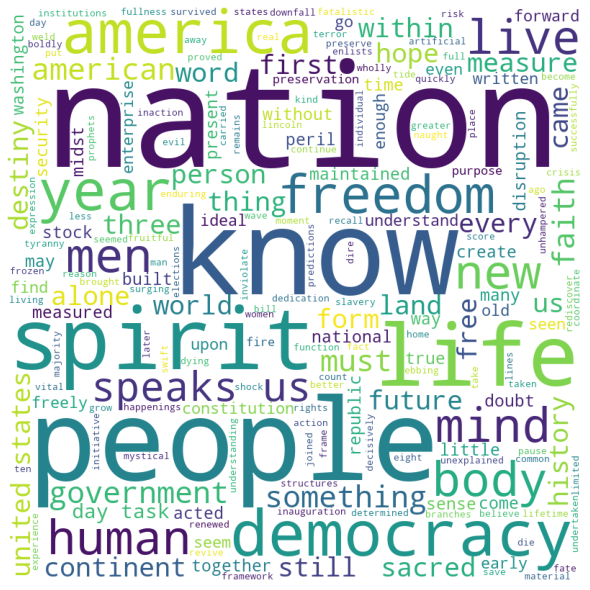

In [261]:
# For Roosevelt
word_cloud((" ").join(Rfw))

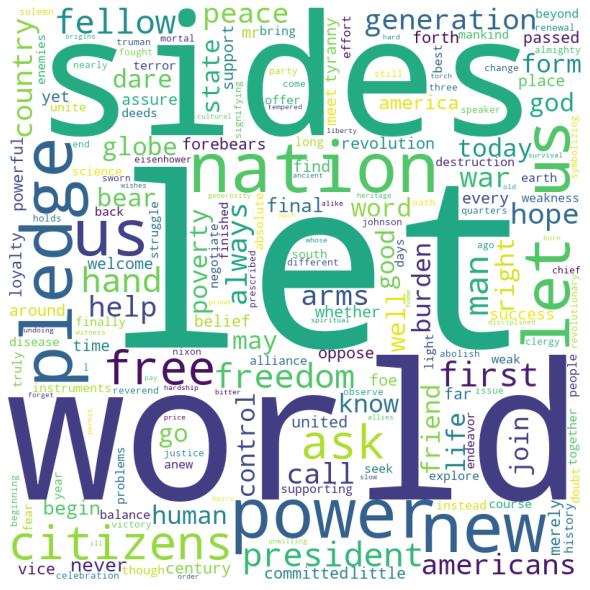

In [262]:
# For Kennedy
word_cloud((" ").join(Kfw))

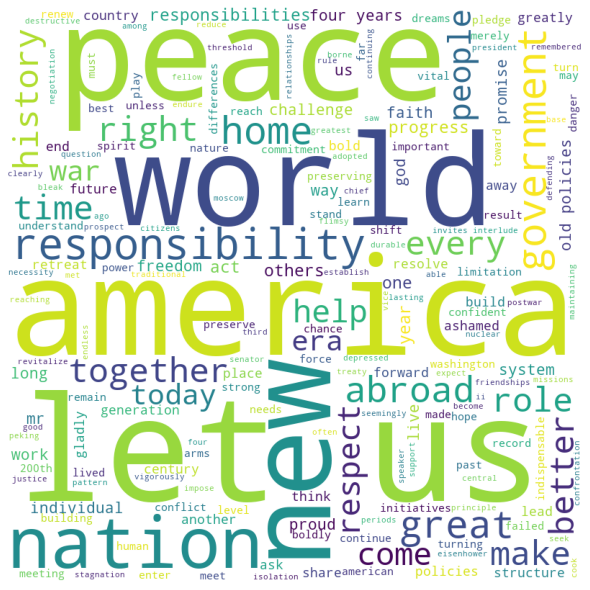

In [264]:
# For Nixon
word_cloud((" ").join(Nfw))

**-------------------------------END-------------------------------------------------------**